## Sales Forecasting of Health and Beauty Products in Olist (Brazilian E-Commerce) 
#### by: Safira Kemala Dewi

### **Contents**

1. Business Problem Understanding
2. Data Understanding 
3. Exploratory Data Analysis (EDA)
4. Data Preprocessing
5. Analytical Approach
6. Conclusion
7. Recommendation

****

### **Business Problem Understanding**

**Context**

Sebagai perusahaan E-Commerce Fulfillment yang bergerak sebagai penyedia jasa logistik pihak ketiga, perusahaan menyediakan pergudangan untuk pengelolaan stok produk dengan sistem terintegrasi, sehingga dapat memenuhi pesanan *customer* dengan tepat waktu dan membebaskan perusahaan <i>E-Commerce</i> dalam mengelola prosesnya. Perusahaan akan melebarkan sayap ke pasar negara Brazil di tahun 2018 mendatang, data historis transaksi yang terdapat pada platform <i>E-Commerce</i> Brazil Olist ini menjadi sangat berharga untuk memberikan insight serta rekomendasi kepada perusahaan. Olist adalah sebuah perusahaan *marketplace* yang bergerak di bidang E-commerce dan wilayah operasinya berpusat di Sao Paulo, Brazil. Perusahaan ini telah menghubungkan berbagai usaha mikro di Brazil dan menawarkan solusi kepada para pelaku usaha untuk meningkatkan penjualan mereka melalui platform online. 

**Problem Statement**

Bagi perusahaan <i>Fulfillment Center</i> yang akan melayani para pelaku usaha di platform <i>E-Commerce</i>, penting bagi perusahaan untuk dapat memprediksi perkembangan pasar di masa yang akan datang, sehingga manajemen dapat mengambil keputusan kapan saat yang tepat untuk melakukan ekspansi gudang dan penambahan karyawan.

Dari data yang dimiliki sekarang ini juga dapat dilakukan analisa untuk mendapatkan insight yang menjadi masukan bagi manajemen untuk melakukan optimalisasi pada proses operasional. 



**Goals**

Berdasarkan masalah diatas, Machine Learning Project ini bertujuan untuk memprediksi penjualan produk, baik secara *Expected Revenue*, *Quantity Produk*, dan *Volume Total* dari produk *Health and Beauty* pada platform <i>E-Commerce</i> di masa yang akan datang, dengan harapan prediksi yang dihasilkan dapat dimanfaatkan untuk pengambilan keputusan manajemen di perusahaan. 

**Analytic Approach**

Jadi, yang akan kita lakukan adalah menganalisis data Brazilian E-Commerce untuk menemukan pola yang tersembunyi dari fitur-fitur yang ada, menganalisis tren dan pertumbuhan penjualan produk, dan menjelaskan korelasi antar fitur.

Kemudian dari Data Brazilian E-Commerce tadi, kita akan bangun sebuah model *Timeseries Forecasting* untuk memprediksi penjualan produk baik dari segi Revenue, Quantity, maupun Volume barang yang terjual untuk menjadi alat bantu bagi pengambilan keputusan oleh management.

**Metric Evaluation**

Evaluasi Metric yang digunakan adalah MAPE, dimana MAPE menggambarkan selisih rata-rata dari nilai Forecast dengan nilai sesungguhnya yang dinotasikan dalam bentuk persentase. MAPE juga merupakan metrics yang paling banyak digunakan karena kemudahan interpretasinya dibandingkan metric lain.

### **Libraries**

In [1]:
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

# Ignore Warning
import warnings
warnings.filterwarnings('ignore')

### **Data Understanding**

Dataset source : https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce?select=olist_products_dataset.csv



Terdapat 9 dataset berbeda yang masing-masing merepresentasikan informasi berbeda terkait transaksi di E-Commerce dari September 2016 sampai Oktober 2018. Berikut file datasetnya:
- olist_customers_dataset.csv
- olist_geolocation_dataset.csv
- olist_orders_dataset.csv
- olist_order_items_dataset.csv
- olist_order_payments_dataset.csv
- olist_order_reviews_dataset.csv
- olist_products_dataset.csv
- olist_sellers_dataset.csv
- product_category_name_translation.csv

Hubungan antar masing-masing dataset dijelaskan pada dokumentasi pada link di atas. 

In [2]:
# Load Dataset Order, Order Items, and Product

df_orders = pd.read_csv('olist_orders_dataset.csv')
df_order_items = pd.read_csv('olist_order_items_dataset.csv')
df_products = pd.read_csv('olist_products_dataset.csv')
df_translation_products = pd.read_csv('product_category_name_translation.csv')

In [3]:
df_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [4]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [5]:
df_order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [6]:
df_order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [7]:
df_order_items['order_item_id'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21])

In [8]:
#order_item_id dapat disebut juga dengan ID pemesanan dari setiap transaksi, ubah ke data type string
df_order_items['order_item_id'] = df_order_items['order_item_id'].astype(str)

In [9]:
# left join dataset df_order & df_order_items

df_orders = df_orders.merge(df_order_items,how='left',on='order_id')
df_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72


In [10]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113425 entries, 0 to 113424
Data columns (total 14 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       113425 non-null  object 
 1   customer_id                    113425 non-null  object 
 2   order_status                   113425 non-null  object 
 3   order_purchase_timestamp       113425 non-null  object 
 4   order_approved_at              113264 non-null  object 
 5   order_delivered_carrier_date   111457 non-null  object 
 6   order_delivered_customer_date  110196 non-null  object 
 7   order_estimated_delivery_date  113425 non-null  object 
 8   order_item_id                  112650 non-null  object 
 9   product_id                     112650 non-null  object 
 10  seller_id                      112650 non-null  object 
 11  shipping_limit_date            112650 non-null  object 
 12  price                         

In [11]:
df_orders[df_orders['order_item_id'].isna() == True]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
306,8e24261a7e58791d10cb1bf9da94df5c,64a254d30eed42cd0e6c36dddb88adf0,unavailable,2017-11-16 15:09:28,2017-11-16 15:26:57,NaN,NaN,2017-12-05 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
671,c272bcd21c287498b4883c7512019702,9582c5bbecc65eb568e2c1d839b5cba1,unavailable,2018-01-31 11:31:37,2018-01-31 14:23:50,NaN,NaN,2018-02-16 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
791,37553832a3a89c9b2db59701c357ca67,7607cd563696c27ede287e515812d528,unavailable,2017-08-14 17:38:02,2017-08-17 00:15:18,NaN,NaN,2017-09-05 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
850,d57e15fb07fd180f06ab3926b39edcd2,470b93b3f1cde85550fc74cd3a476c78,unavailable,2018-01-08 19:39:03,2018-01-09 07:26:08,NaN,NaN,2018-02-06 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
1294,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaN,NaN,NaN,2018-09-12 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113204,aaab15da689073f8f9aa978a390a69d1,df20748206e4b865b2f14a5eabbfcf34,unavailable,2018-01-16 14:27:59,2018-01-17 03:37:34,NaN,NaN,2018-02-06 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
113236,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaN,NaN,NaN,2018-10-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
113324,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,NaN,NaN,NaN,2018-09-27 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
113325,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,NaN,NaN,2017-09-15 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df_products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [13]:
df_translation_products.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [14]:
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [15]:
df_products[df_products['product_category_name'].isna() == True]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN,NaN,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN,NaN,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN,NaN,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,NaN,NaN,NaN,NaN,1300.0,45.0,16.0,45.0


In [16]:
# left join dataset df_products dan df_translation_products

df_products = df_products.merge(df_translation_products,how='left',on='product_category_name')
df_products

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares
...,...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0,furniture_decor
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0,construction_tools_lights
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0,bed_bath_table
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0,computers_accessories


In [17]:
# drop and rename 
df_products = df_products.drop(columns='product_category_name')
df_products.rename(columns={"product_category_name_english": "product_category_name"}, inplace=True)

**Combining Data 1: Product Order**

Berikut ini merupakan data transaksi customer yang didapat dari hasil merge/join antara data orders, order_item, products, dan translation products. Berikut struktur data dan informasinya.



In [18]:
# left join df_products & df_orders
df_orders_products = df_orders.merge(df_products,how='left',on='product_id')
df_orders_products

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,...,29.99,8.72,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1,595fac2a385ac33a80bd5114aec74eb8,...,118.70,22.76,29.0,178.0,1.0,400.0,19.0,13.0,19.0,perfumery
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1,aa4383b373c6aca5d8797843e5594415,...,159.90,19.22,46.0,232.0,1.0,420.0,24.0,19.0,21.0,auto
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,1,d0b61bfb1de832b15ba9d266ca96e5b0,...,45.00,27.20,59.0,468.0,3.0,450.0,30.0,10.0,20.0,pet_shop
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,1,65266b2da20d04dbe00c5c2d3bb7859e,...,19.90,8.72,38.0,316.0,4.0,250.0,51.0,15.0,15.0,stationery
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113420,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,1,f1d4ce8c6dd66c47bbaa8c6781c2a923,...,174.90,20.10,52.0,828.0,4.0,4950.0,40.0,10.0,40.0,baby
113421,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,1,b80910977a37536adeddd63663f916ad,...,205.99,65.02,51.0,500.0,2.0,13300.0,32.0,90.0,22.0,home_appliances_2
113422,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,1,d1c427060a0f73f6b889a5c7c61f2ac4,...,179.99,40.59,59.0,1893.0,1.0,6550.0,20.0,20.0,20.0,computers_accessories
113423,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,2,d1c427060a0f73f6b889a5c7c61f2ac4,...,179.99,40.59,59.0,1893.0,1.0,6550.0,20.0,20.0,20.0,computers_accessories


In [19]:
date_list = ['order_purchase_timestamp','order_approved_at','order_delivered_carrier_date','order_delivered_customer_date','order_estimated_delivery_date', 'shipping_limit_date']

for i in date_list:
    df_orders_products[i] = pd.to_datetime(df_orders_products[i])

In [20]:
df_orders_products.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113425 entries, 0 to 113424
Data columns (total 22 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       113425 non-null  object        
 1   customer_id                    113425 non-null  object        
 2   order_status                   113425 non-null  object        
 3   order_purchase_timestamp       113425 non-null  datetime64[ns]
 4   order_approved_at              113264 non-null  datetime64[ns]
 5   order_delivered_carrier_date   111457 non-null  datetime64[ns]
 6   order_delivered_customer_date  110196 non-null  datetime64[ns]
 7   order_estimated_delivery_date  113425 non-null  datetime64[ns]
 8   order_item_id                  112650 non-null  object        
 9   product_id                     112650 non-null  object        
 10  seller_id                      112650 non-null  object        
 11  

In [21]:
df_orders_products

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,...,29.99,8.72,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1,595fac2a385ac33a80bd5114aec74eb8,...,118.70,22.76,29.0,178.0,1.0,400.0,19.0,13.0,19.0,perfumery
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1,aa4383b373c6aca5d8797843e5594415,...,159.90,19.22,46.0,232.0,1.0,420.0,24.0,19.0,21.0,auto
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,1,d0b61bfb1de832b15ba9d266ca96e5b0,...,45.00,27.20,59.0,468.0,3.0,450.0,30.0,10.0,20.0,pet_shop
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,1,65266b2da20d04dbe00c5c2d3bb7859e,...,19.90,8.72,38.0,316.0,4.0,250.0,51.0,15.0,15.0,stationery
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113420,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,1,f1d4ce8c6dd66c47bbaa8c6781c2a923,...,174.90,20.10,52.0,828.0,4.0,4950.0,40.0,10.0,40.0,baby
113421,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,1,b80910977a37536adeddd63663f916ad,...,205.99,65.02,51.0,500.0,2.0,13300.0,32.0,90.0,22.0,home_appliances_2
113422,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,1,d1c427060a0f73f6b889a5c7c61f2ac4,...,179.99,40.59,59.0,1893.0,1.0,6550.0,20.0,20.0,20.0,computers_accessories
113423,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,2,d1c427060a0f73f6b889a5c7c61f2ac4,...,179.99,40.59,59.0,1893.0,1.0,6550.0,20.0,20.0,20.0,computers_accessories


In [22]:
# load dataset geolocation
df_geo = pd.read_csv('olist_geolocation_dataset.csv')
df_geo.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [23]:
df_geo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [24]:
# Cek jumlah data duplikat
df_geo.duplicated().sum()

261831

In [25]:
# Cek data duplikat
df_duplicate=df_geo[df_geo.duplicated()==True]
df_duplicate

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
15,1046,-23.546081,-46.644820,sao paulo,SP
44,1046,-23.546081,-46.644820,sao paulo,SP
65,1046,-23.546081,-46.644820,sao paulo,SP
66,1009,-23.546935,-46.636588,sao paulo,SP
67,1046,-23.546081,-46.644820,sao paulo,SP
...,...,...,...,...,...
1000153,99970,-28.343273,-51.873734,ciriaco,RS
1000154,99950,-28.070493,-52.011342,tapejara,RS
1000159,99900,-27.877125,-52.224882,getulio vargas,RS
1000160,99950,-28.071855,-52.014716,tapejara,RS


In [26]:
# Drop data duplikat
df_geo.drop_duplicates(inplace=True)
df_geo

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
...,...,...,...,...,...
1000155,99965,-28.180655,-52.034367,agua santa,RS
1000156,99950,-28.072188,-52.011272,tapejara,RS
1000157,99950,-28.068864,-52.012964,tapejara,RS
1000158,99950,-28.068639,-52.010705,tapejara,RS


In [27]:
df_geo.rename(columns={"geolocation_zip_code_prefix": "zip_code_prefix"}, inplace=True)

In [28]:
df_customers = pd.read_csv("olist_customers_dataset.csv")
df_customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [29]:
# jumlah customers yang melakukan transaksi
df_customers['customer_unique_id'].nunique()

96096

In [30]:
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [31]:
df_customers.rename(columns={"customer_zip_code_prefix": "zip_code_prefix"}, inplace=True)

**Combining Data 2: Customer Geolocation**

Berikut ini merupakan data terkait lokasi customer yang didapat dari hasil merge/join antara data customer dan geolocation. 

In [32]:
df_customers = df_customers.merge(df_geo,how='left',on='zip_code_prefix')
df_customers

,customer_id,customer_unique_id,zip_code_prefix,customer_city,customer_state,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.509897,-47.397866,franca,SP
1,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.497396,-47.399241,franca,SP
2,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.510459,-47.399553,franca,SP
3,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.480940,-47.394161,franca,SP
4,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.515413,-47.398194,franca,SP
...,...,...,...,...,...,...,...,...,...
10328001,274fa6071e5e17fe303b9748641082c8,84732c5050c01db9b23e19ba39899398,6703,cotia,SP,-23.598092,-46.904582,cotia,SP
10328002,274fa6071e5e17fe303b9748641082c8,84732c5050c01db9b23e19ba39899398,6703,cotia,SP,-23.594171,-46.908091,cotia,SP
10328003,274fa6071e5e17fe303b9748641082c8,84732c5050c01db9b23e19ba39899398,6703,cotia,SP,-23.599369,-46.905603,cotia,SP
10328004,274fa6071e5e17fe303b9748641082c8,84732c5050c01db9b23e19ba39899398,6703,cotia,SP,-23.584425,-46.892014,cotia,SP


In [33]:
# Cek jumlah data duplikat pada seluruh kolom kecuali geolocation_lat dan geolocation_lng
df_customers.duplicated(['customer_id', 'customer_unique_id', 'zip_code_prefix', 'customer_city', 'customer_state']).sum()

10228565

In [34]:
df_cust_duplicate = df_customers[df_customers.duplicated(['customer_id', 'customer_unique_id', 'zip_code_prefix', 'customer_city', 'customer_state'])==True]
df_cust_duplicate

,customer_id,customer_unique_id,zip_code_prefix,customer_city,customer_state,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
1,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.497396,-47.399241,franca,SP
2,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.510459,-47.399553,franca,SP
3,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.480940,-47.394161,franca,SP
4,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.515413,-47.398194,franca,SP
5,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.513713,-47.396644,franca,SP
...,...,...,...,...,...,...,...,...,...
10328001,274fa6071e5e17fe303b9748641082c8,84732c5050c01db9b23e19ba39899398,6703,cotia,SP,-23.598092,-46.904582,cotia,SP
10328002,274fa6071e5e17fe303b9748641082c8,84732c5050c01db9b23e19ba39899398,6703,cotia,SP,-23.594171,-46.908091,cotia,SP
10328003,274fa6071e5e17fe303b9748641082c8,84732c5050c01db9b23e19ba39899398,6703,cotia,SP,-23.599369,-46.905603,cotia,SP
10328004,274fa6071e5e17fe303b9748641082c8,84732c5050c01db9b23e19ba39899398,6703,cotia,SP,-23.584425,-46.892014,cotia,SP


In [35]:
# drop subset
df_customers.drop_duplicates(['customer_id', 'customer_unique_id', 'zip_code_prefix', 'customer_city', 'customer_state'], inplace=True)
df_customers.head()

,customer_id,customer_unique_id,zip_code_prefix,customer_city,customer_state,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.509897,-47.397866,franca,SP
126,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,-23.726853,-46.545746,sao bernardo do campo,SP
251,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,-23.527788,-46.660310,sao paulo,SP
285,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,-23.496930,-46.185352,mogi das cruzes,SP
368,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,-22.987222,-47.151073,campinas,SP


In [36]:
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99441 entries, 0 to 10327898
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customer_id         99441 non-null  object 
 1   customer_unique_id  99441 non-null  object 
 2   zip_code_prefix     99441 non-null  int64  
 3   customer_city       99441 non-null  object 
 4   customer_state      99441 non-null  object 
 5   geolocation_lat     99163 non-null  float64
 6   geolocation_lng     99163 non-null  float64
 7   geolocation_city    99163 non-null  object 
 8   geolocation_state   99163 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 7.6+ MB


In [37]:
df_all = df_orders_products.merge(df_customers, how= 'left', on='customer_id')
df_all

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,product_width_cm,product_category_name,customer_unique_id,zip_code_prefix,customer_city,customer_state,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,...,13.0,housewares,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,-23.574809,-46.587471,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1,595fac2a385ac33a80bd5114aec74eb8,...,19.0,perfumery,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,-12.169860,-44.988369,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1,aa4383b373c6aca5d8797843e5594415,...,21.0,auto,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,-16.746337,-48.514624,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,1,d0b61bfb1de832b15ba9d266ca96e5b0,...,20.0,pet_shop,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,-5.767733,-35.275467,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,1,65266b2da20d04dbe00c5c2d3bb7859e,...,15.0,stationery,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,-23.675037,-46.524784,santo andre,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113420,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,1,f1d4ce8c6dd66c47bbaa8c6781c2a923,...,40.0,baby,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP,-24.001467,-46.446355,praia grande,SP
113421,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,1,b80910977a37536adeddd63663f916ad,...,22.0,home_appliances_2,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA,-17.891522,-39.370942,nova vicosa,BA
113422,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,1,d1c427060a0f73f6b889a5c7c61f2ac4,...,20.0,computers_accessories,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ,-22.555985,-42.690761,japuiba,RJ
113423,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,2,d1c427060a0f73f6b889a5c7c61f2ac4,...,20.0,computers_accessories,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ,-22.555985,-42.690761,japuiba,RJ


In [38]:
# drop column geolocation_city dan geolocation_state

df_all = df_all.drop(columns=['geolocation_city', 'geolocation_state'])
df_all

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,product_length_cm,product_height_cm,product_width_cm,product_category_name,customer_unique_id,zip_code_prefix,customer_city,customer_state,geolocation_lat,geolocation_lng
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,...,19.0,8.0,13.0,housewares,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,-23.574809,-46.587471
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1,595fac2a385ac33a80bd5114aec74eb8,...,19.0,13.0,19.0,perfumery,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,-12.169860,-44.988369
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1,aa4383b373c6aca5d8797843e5594415,...,24.0,19.0,21.0,auto,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,-16.746337,-48.514624
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,1,d0b61bfb1de832b15ba9d266ca96e5b0,...,30.0,10.0,20.0,pet_shop,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,-5.767733,-35.275467
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,1,65266b2da20d04dbe00c5c2d3bb7859e,...,51.0,15.0,15.0,stationery,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,-23.675037,-46.524784
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113420,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,1,f1d4ce8c6dd66c47bbaa8c6781c2a923,...,40.0,10.0,40.0,baby,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP,-24.001467,-46.446355
113421,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,1,b80910977a37536adeddd63663f916ad,...,32.0,90.0,22.0,home_appliances_2,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA,-17.891522,-39.370942
113422,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,1,d1c427060a0f73f6b889a5c7c61f2ac4,...,20.0,20.0,20.0,computers_accessories,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ,-22.555985,-42.690761
113423,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,2,d1c427060a0f73f6b889a5c7c61f2ac4,...,20.0,20.0,20.0,computers_accessories,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ,-22.555985,-42.690761


In [39]:
#rename zipe_code_prefix, geolocation_lat, geolocation_lng

df_all.rename(columns={"zip_code_prefix": "customer_zip_code_prefix",
                       "geolocation_lat": "customer_lat",
                       "geolocation_lng": "customer_lng"}, 
              inplace=True)

In [40]:
df_all.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,product_length_cm,product_height_cm,product_width_cm,product_category_name,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,customer_lat,customer_lng
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,...,19.0,8.0,13.0,housewares,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,-23.574809,-46.587471
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1,595fac2a385ac33a80bd5114aec74eb8,...,19.0,13.0,19.0,perfumery,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,-12.169860,-44.988369
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1,aa4383b373c6aca5d8797843e5594415,...,24.0,19.0,21.0,auto,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,-16.746337,-48.514624
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,1,d0b61bfb1de832b15ba9d266ca96e5b0,...,30.0,10.0,20.0,pet_shop,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,-5.767733,-35.275467
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,1,65266b2da20d04dbe00c5c2d3bb7859e,...,51.0,15.0,15.0,stationery,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,-23.675037,-46.524784


In [41]:
# load dataset Sellers
df_sellers = pd.read_csv('olist_sellers_dataset.csv')
df_sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [42]:
df_sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


**Combining Data 3: Seller Geolocation**

Berikut ini merupakan data terkait lokasi seller yang didapat dari hasil merge/join antara data seller dan geolocation.

In [43]:
df_sellers.rename(columns={"seller_zip_code_prefix": "zip_code_prefix"}, inplace=True)

In [44]:
#merge dataset df_seller dan df_geo
df_sellers = df_sellers.merge(df_geo,how='left',on='zip_code_prefix')
df_sellers

,seller_id,zip_code_prefix,seller_city,seller_state,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,-22.898536,-47.063125,campinas,SP
1,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,-22.895499,-47.061944,campinas,SP
2,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,-22.891740,-47.060820,campinas,SP
3,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,-22.895762,-47.066144,campinas,SP
4,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,-22.896154,-47.062431,campinas,SP
...,...,...,...,...,...,...,...,...
311791,9e25199f6ef7e7c347120ff175652c3b,12051,taubate,SP,-23.011130,-45.592347,taubate,SP
311792,9e25199f6ef7e7c347120ff175652c3b,12051,taubate,SP,-23.013452,-45.584299,taubaté,SP
311793,9e25199f6ef7e7c347120ff175652c3b,12051,taubate,SP,-23.009155,-45.592019,taubate,SP
311794,9e25199f6ef7e7c347120ff175652c3b,12051,taubate,SP,-23.009019,-45.584925,taubate,SP


In [45]:
# drop subset
df_sellers.drop_duplicates(['seller_id','zip_code_prefix', 'seller_city', 'seller_state'], inplace=True)
df_sellers

,seller_id,zip_code_prefix,seller_city,seller_state,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,-22.898536,-47.063125,campinas,SP
58,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP,-22.382941,-46.946641,mogi-guacu,SP
149,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ,-22.910641,-43.176510,rio de janeiro,RJ
247,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP,-23.657250,-46.610759,sao paulo,SP
307,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP,-22.971648,-46.533618,bragança paulista,SP
...,...,...,...,...,...,...,...,...
311508,98dddbc4601dd4443ca174359b237166,87111,sarandi,PR,-23.456431,-51.866369,sarandi,PR
311570,f8201cab383e484733266d1906e2fdfa,88137,palhoca,SC,-27.623801,-48.674286,palhoça,SC
311602,74871d19219c7d518d0090283e03c137,4650,sao paulo,SP,-23.659845,-46.677882,sao paulo,SP
311647,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS,-31.744231,-52.328761,pelotas,RS


**Combining Data 4: Customer Order**

Berikut ini merupakan data transaksi customer yang didapat dari hasil merge/join antara data product order, customer geolocation, dan seller. Dengan demikian, pada project ini kami hanya menggunakan 7 dataset, untuk analisis data baik secara deskriptif maupun prediktif (forecasting), tanpa data payment dan review.

In [46]:
df_all = df_all.merge(df_sellers, how= 'left', on='seller_id')
df_all

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,customer_state,customer_lat,customer_lng,zip_code_prefix,seller_city,seller_state,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,...,SP,-23.574809,-46.587471,9350.0,maua,SP,-23.680114,-46.452454,maua,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1,595fac2a385ac33a80bd5114aec74eb8,...,BA,-12.169860,-44.988369,31570.0,belo horizonte,SP,-19.810119,-43.984727,belo horizonte,MG
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1,aa4383b373c6aca5d8797843e5594415,...,GO,-16.746337,-48.514624,14840.0,guariba,SP,-21.362358,-48.232976,guariba,SP
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,1,d0b61bfb1de832b15ba9d266ca96e5b0,...,RN,-5.767733,-35.275467,31842.0,belo horizonte,MG,-19.840168,-43.923299,belo horizonte,MG
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,1,65266b2da20d04dbe00c5c2d3bb7859e,...,SP,-23.675037,-46.524784,8752.0,mogi das cruzes,SP,-23.551707,-46.260979,mogi das cruzes,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113420,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,1,f1d4ce8c6dd66c47bbaa8c6781c2a923,...,SP,-24.001467,-46.446355,17602.0,tupa,SP,-21.935321,-50.497562,tupa,SP
113421,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,1,b80910977a37536adeddd63663f916ad,...,BA,-17.891522,-39.370942,8290.0,sao paulo,SP,-23.551013,-46.448489,sao paulo,SP
113422,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,1,d1c427060a0f73f6b889a5c7c61f2ac4,...,RJ,-22.555985,-42.690761,37175.0,ilicinea,MG,-20.944706,-45.827098,ilicinea,MG
113423,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,2,d1c427060a0f73f6b889a5c7c61f2ac4,...,RJ,-22.555985,-42.690761,37175.0,ilicinea,MG,-20.944706,-45.827098,ilicinea,MG


**Remove Unused Data**

Selanjutnya, kita akan menghapus kolom-kolom yang tidak diperlukan untuk analisis, yaitu di antaranya : kolom `product_name_lenght`, `product_description_length`, `product_weight_g`, dan `product_photos_qty`, serta `geolocation_city` dan `geolocation_state`.

In [47]:
# drop column geolocation_city dan geolocation_state
df_all = df_all.drop(columns=['product_name_lenght', 'product_description_lenght', 'product_weight_g', 'product_photos_qty', 'geolocation_city', 'geolocation_state'])

#rename zipe_code_prefix, geolocation_lat, geolocation_lng
df_all.rename(columns={"zip_code_prefix": "seller_zip_code_prefix",
                       "geolocation_lat": "seller_lat",
                       "geolocation_lng": "seller_lng"}, 
              inplace=True)

In [48]:
df_all.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,customer_zip_code_prefix,customer_city,customer_state,customer_lat,customer_lng,seller_zip_code_prefix,seller_city,seller_state,seller_lat,seller_lng
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,...,3149,sao paulo,SP,-23.574809,-46.587471,9350.0,maua,SP,-23.680114,-46.452454
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1,595fac2a385ac33a80bd5114aec74eb8,...,47813,barreiras,BA,-12.169860,-44.988369,31570.0,belo horizonte,SP,-19.810119,-43.984727
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1,aa4383b373c6aca5d8797843e5594415,...,75265,vianopolis,GO,-16.746337,-48.514624,14840.0,guariba,SP,-21.362358,-48.232976
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,1,d0b61bfb1de832b15ba9d266ca96e5b0,...,59296,sao goncalo do amarante,RN,-5.767733,-35.275467,31842.0,belo horizonte,MG,-19.840168,-43.923299
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,1,65266b2da20d04dbe00c5c2d3bb7859e,...,9195,santo andre,SP,-23.675037,-46.524784,8752.0,mogi das cruzes,SP,-23.551707,-46.260979


In [49]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113425 entries, 0 to 113424
Data columns (total 29 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       113425 non-null  object        
 1   customer_id                    113425 non-null  object        
 2   order_status                   113425 non-null  object        
 3   order_purchase_timestamp       113425 non-null  datetime64[ns]
 4   order_approved_at              113264 non-null  datetime64[ns]
 5   order_delivered_carrier_date   111457 non-null  datetime64[ns]
 6   order_delivered_customer_date  110196 non-null  datetime64[ns]
 7   order_estimated_delivery_date  113425 non-null  datetime64[ns]
 8   order_item_id                  112650 non-null  object        
 9   product_id                     112650 non-null  object        
 10  seller_id                      112650 non-null  object        
 11  

Note:
- Dataset merupakan listing customer orders dari [Olist Store](https://olist.com/pt-br/) tahun 2016-2018.
- Setiap transaksi memiliki ID unik pemesanan yang diberi nama `order_id`. Setiap transaksi dapat melakukan pemesanan beberapa item (`product_id`), sehingga `order_id` pada baris dataset dapat memiliki duplikat.
- Setiap baris data merepresentasikan informasi terkait pemesanan dari berbagai marketplace di Brazil.

**Attribute Information**

| **Attribute** | **Data Type** | **Description** |
| --- | --- | --- |
| order_id | Object | ID pemesanan |
| customer_id | Object | ID customer|
| order_status | Object| Status pemesanan |
| order_purchase_timestamp | Datetime | Waktu pesanan masuk |
| order_approved_at | Datetime | Waktu pesanan yang disetujui |
| order_delivered_carrier_date | Datetime | Waktu pengiriman pesanan via kurir |
| order_delivered_customer_date | Datetime | Waktu pengiriman ke customer |
| order_estimated_delivery_date | Datetime | Estimasi waktu pengiriman|
| order_item_id | Float | Jumlah item pemesanan |
| shipping_limit_date | Datetime | Batas waktu pengiriman |
| price | Float |  Harga |
| product_length_cm | Float | panjang produk (cm) |
| product_height_cm | Float | tinggi produk (cm) |
| product_width_cm | Float | lebar produk (cm) |
| freight_value | Float | Biaya pengiriman |
| product_category_name  | Object | nama kategori produk |
| customer_unique_id | Object | ID unik customer|
| customer_zip_code_prefix | Object | Kode pos customer|
| customer_city| Object | Kota customer |
| customer_state | Object | State customer |
| customer_lat | Float | Koordinat latitude customer |
| customer_lng | Float | Koordinat longitude customer |
| seller_zip_code_prefix | Object | Kode pos customer|
| seller_city| Object | Kota penjual |
| seller_state | Object | State penjual |
| seller_lat | Float | Koordinat latitude penjual |
| seller_lng | Float | Koordinat longitude  penjual |

**Overview Brazillian E-Commerce**

In [50]:
%%html
<div class='tableauPlaceholder' id='viz1664356397393' style='position: relative'><noscript><a href='#'><img alt='Dashboard 1 ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;ED&#47;EDA1_16643563826120&#47;Dashboard1&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='EDA1_16643563826120&#47;Dashboard1' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;ED&#47;EDA1_16643563826120&#47;Dashboard1&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1664356397393');                    var vizElement = divElement.getElementsByTagName('object')[0];                    if ( divElement.offsetWidth > 800 ) { vizElement.style.minWidth='420px';vizElement.style.maxWidth='950px';vizElement.style.width='100%';vizElement.style.minHeight='387px';vizElement.style.maxHeight='687px';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';} else if ( divElement.offsetWidth > 500 ) { vizElement.style.minWidth='420px';vizElement.style.maxWidth='950px';vizElement.style.width='100%';vizElement.style.minHeight='387px';vizElement.style.maxHeight='687px';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';} else { vizElement.style.width='100%';vizElement.style.height='1227px';}                     var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

E-Commerce Brazil menunjukkan tren yang meningkat seiring waktu dari September 2016 - Oktober 2018. Kita dapat melihat bahwa terdapat beberapa periode peak season pada bulan-bulan tertentu, dengan peak season tertinggi terjadi pada November 2017. Hal ini dikarenakan ada peringatan Black Friday (Holiday Shopping). Namun secara umum kita dapat melihat bahwa dari tahun 2016 hingga 2018 transaksi online di Olist Store mengalami peningkatan. 

Berdasarkan overview Olist Store di atas, potensi pasar yang paling tinggi terdapat di Negara Bagian São Paulo (SP) dengan 3 sektor produk kategori tertingginya yaitu, health_beauty, watches_gifts, dan bed_bath_table.



### **Exploratory Data Analysis (EDA)**

Pertama-tama, kita akan memfilter dataset transaksi customer di atas dengan kategori produk health & beauty yang berlokasi di Negara Bagian São Paulo (SP).

In [51]:
df_hb = df_all[(df_all['product_category_name'] == 'health_beauty') & (df_all['customer_state'] == 'SP')]
df_hb.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,customer_zip_code_prefix,customer_city,customer_state,customer_lat,customer_lng,seller_zip_code_prefix,seller_city,seller_state,seller_lat,seller_lng
21,203096f03d82e0dffbc41ebc2e2bcfb7,d2b091571da224a1b36412c18bc3bbfe,delivered,2017-09-18 14:31:30,2017-09-19 04:04:09,2017-10-06 17:50:03,2017-10-09 22:23:46,2017-09-28,1,5ac9d9e379c606e36a8094a6046f75dc,...,4001,sao paulo,SP,-23.572301,-46.652000,4438.0,sao paulo,SP,-23.677741,-46.668647
22,f848643eec1d69395095eb3840d2051e,4fa1cd166fa598be6de80fa84eaade43,delivered,2018-03-15 08:52:40,2018-03-15 09:09:31,2018-03-15 19:52:48,2018-03-19 18:08:32,2018-03-29,1,2b4609f8948be18874494203496bc318,...,8473,sao paulo,SP,-23.529467,-46.635022,9015.0,santo andre,SP,-23.665703,-46.518082
46,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,NaT,2018-06-28,1,c50ca07e9e4db9ea5011f06802c0aea0,...,13215,jundiai,SP,-23.175897,-46.886594,11701.0,praia grande,SP,-24.011288,-46.418734
94,b8801cccd8068de30112e4f49903d74a,f26a435864aebedff7f7c84f82ee229f,delivered,2017-07-30 03:06:35,2017-07-30 03:25:08,2017-07-31 16:42:54,2017-08-01 14:27:31,2017-08-16,1,154e7e31ebfa092203795c972e5804a6,...,8552,poa,SP,-23.527564,-46.362737,9015.0,santo andre,SP,-23.665703,-46.518082
117,a5474c0071dd5d1074e12d417078bbd0,ef15b3240b2083e0487762ee2978d2b8,delivered,2018-07-30 22:41:44,2018-08-01 02:50:15,2018-08-02 10:35:00,2018-08-03 19:28:47,2018-08-02,1,1f75be631e988bb0ad750e60e18d043b,...,6434,barueri,SP,-23.535584,-46.883100,4208.0,sao paulo,SP,-23.584615,-46.601932


In [52]:
df_hb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4204 entries, 21 to 113419
Data columns (total 29 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       4204 non-null   object        
 1   customer_id                    4204 non-null   object        
 2   order_status                   4204 non-null   object        
 3   order_purchase_timestamp       4204 non-null   datetime64[ns]
 4   order_approved_at              4204 non-null   datetime64[ns]
 5   order_delivered_carrier_date   4169 non-null   datetime64[ns]
 6   order_delivered_customer_date  4126 non-null   datetime64[ns]
 7   order_estimated_delivery_date  4204 non-null   datetime64[ns]
 8   order_item_id                  4204 non-null   object        
 9   product_id                     4204 non-null   object        
 10  seller_id                      4204 non-null   object        
 11  shipping_limit

In [53]:
# drop unrelevant features

df_hb.drop(['customer_id', 'seller_id', 'customer_unique_id', 'customer_state', 'product_category_name'],axis=1, inplace=True)

Mari kita check informasi dataframenya untuk dataset ini.

In [54]:
# Cek info lebih detail untuk setiap fitur
listItem = []

for col in df_hb.columns:
    listItem.append([col, df_hb[col].dtype, df_hb[col].isna().sum(), round((df_hb[col].isna().sum()/len(df_hb[col]))*100, 2),
                    df_hb[col].nunique(), list(df_hb[col].drop_duplicates().sample(3).values)]);

df_desc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
df_desc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,order_id,object,0,0.00,3789,"[fcea4bf64c9d15bef64a683ae2243e35, c33d4d6f164..."
1,order_status,object,0,0.00,5,"[delivered, shipped, processing]"
2,order_purchase_timestamp,datetime64[ns],0,0.00,3778,"[2017-10-10T22:51:38.000000000, 2018-04-01T14:..."
3,order_approved_at,datetime64[ns],0,0.00,3761,"[2018-01-09T20:11:36.000000000, 2017-04-11T03:..."
4,order_delivered_carrier_date,datetime64[ns],35,0.83,3452,"[2017-04-20T14:15:44.000000000, 2018-02-19T23:..."
5,order_delivered_customer_date,datetime64[ns],78,1.86,3713,"[2017-08-04T12:53:57.000000000, 2018-06-05T18:..."
6,order_estimated_delivery_date,datetime64[ns],0,0.00,395,"[2017-08-28T00:00:00.000000000, 2017-09-26T00:..."
7,order_item_id,object,0,0.00,21,"[2, 10, 18]"
8,product_id,object,0,0.00,1429,"[2267b228a5bcef6dcc0fd584a4512908, 78b3226efe1..."
9,shipping_limit_date,datetime64[ns],0,0.00,3785,"[2017-05-25T18:02:32.000000000, 2017-12-29T12:..."


Sebelum melakukan analisis deskriptif, ubah terlebih dahulu tipe data pada kolom `customer_zip_code_prefix` dan `seller_zip_code_prefix` menjadi string karena kedua kolom tersebut berisi nilai kategorikal.

In [55]:
# change data type to string
data_type = ['customer_zip_code_prefix', 'seller_zip_code_prefix']
df_hb[data_type] = df_hb[data_type].astype(str)

#### **Descriptive Analysis**

Berikutnya, kolom product_length_cm, product_height_cm, product_width_cm dapat kita ganti dengan satu kolom saja, yaitu product_volume dengan **asumsi bahwa perhitungan volume sama** untuk setiap produk, yaitu:
Volume (V) = Panjang x Lebar x Tinggi 

In [56]:
df_hb['product_volume'] = df_hb['product_length_cm'] * df_hb['product_height_cm'] * df_hb['product_width_cm']

#check
df_hb[['product_length_cm','product_height_cm','product_width_cm','product_volume']]

,product_length_cm,product_height_cm,product_width_cm,product_volume
21,21.0,16.0,13.0,4368.0
22,22.0,10.0,18.0,3960.0
46,25.0,14.0,18.0,6300.0
94,20.0,15.0,15.0,4500.0
117,25.0,10.0,15.0,3750.0
...,...,...,...,...
113378,18.0,19.0,23.0,7866.0
113388,16.0,4.0,16.0,1024.0
113390,19.0,12.0,13.0,2964.0
113401,21.0,3.0,15.0,945.0


In [57]:
df_hb.head()

,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,shipping_limit_date,...,customer_zip_code_prefix,customer_city,customer_lat,customer_lng,seller_zip_code_prefix,seller_city,seller_state,seller_lat,seller_lng,product_volume
21,203096f03d82e0dffbc41ebc2e2bcfb7,delivered,2017-09-18 14:31:30,2017-09-19 04:04:09,2017-10-06 17:50:03,2017-10-09 22:23:46,2017-09-28,1,5ac9d9e379c606e36a8094a6046f75dc,2017-09-25 04:04:09,...,4001,sao paulo,-23.572301,-46.652000,4438.0,sao paulo,SP,-23.677741,-46.668647,4368.0
22,f848643eec1d69395095eb3840d2051e,delivered,2018-03-15 08:52:40,2018-03-15 09:09:31,2018-03-15 19:52:48,2018-03-19 18:08:32,2018-03-29,1,2b4609f8948be18874494203496bc318,2018-03-23 09:09:31,...,8473,sao paulo,-23.529467,-46.635022,9015.0,santo andre,SP,-23.665703,-46.518082,3960.0
46,ee64d42b8cf066f35eac1cf57de1aa85,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,NaT,2018-06-28,1,c50ca07e9e4db9ea5011f06802c0aea0,2018-06-13 04:30:33,...,13215,jundiai,-23.175897,-46.886594,11701.0,praia grande,SP,-24.011288,-46.418734,6300.0
94,b8801cccd8068de30112e4f49903d74a,delivered,2017-07-30 03:06:35,2017-07-30 03:25:08,2017-07-31 16:42:54,2017-08-01 14:27:31,2017-08-16,1,154e7e31ebfa092203795c972e5804a6,2017-08-08 03:25:08,...,8552,poa,-23.527564,-46.362737,9015.0,santo andre,SP,-23.665703,-46.518082,4500.0
117,a5474c0071dd5d1074e12d417078bbd0,delivered,2018-07-30 22:41:44,2018-08-01 02:50:15,2018-08-02 10:35:00,2018-08-03 19:28:47,2018-08-02,1,1f75be631e988bb0ad750e60e18d043b,2018-08-03 02:50:15,...,6434,barueri,-23.535584,-46.883100,4208.0,sao paulo,SP,-23.584615,-46.601932,3750.0


In [58]:
df_hb['customer_city'].nunique()

318

In [59]:
# Cek deskriptif statistik fitur numerikal
df_hb.describe()

,price,freight_value,product_length_cm,product_height_cm,product_width_cm,customer_lat,customer_lng,seller_lat,seller_lng,product_volume
count,4204.000000,4204.000000,4204.000000,4204.000000,4204.000000,4201.000000,4201.000000,4204.000000,4204.000000,4204.000000
mean,109.967940,13.639767,23.236441,13.487631,17.826832,-23.223821,-46.975568,-22.416047,-46.896728,7674.315414
std,153.520734,10.002537,8.254761,9.426656,7.059213,0.744466,0.991073,4.063099,2.015815,19997.370376
min,1.200000,0.000000,11.000000,2.000000,9.000000,-25.011812,-52.165241,-31.772413,-57.086320,352.000000
25%,31.900000,8.270000,18.000000,9.000000,15.000000,-23.606109,-46.982493,-23.665703,-47.657366,2520.000000
50%,65.000000,11.885000,21.000000,12.000000,16.000000,-23.521241,-46.679788,-23.486684,-46.612423,4096.000000
75%,112.870000,15.260000,26.000000,16.000000,19.000000,-23.102253,-46.548126,-22.602586,-46.506552,6300.000000
max,2899.000000,173.230000,97.000000,105.000000,105.000000,-20.004728,-44.444586,-2.546079,-38.455265,251625.000000


In [60]:
# Cek deskriptif statistik fitur kategorikal
df_hb.describe(include='object')

,order_id,order_status,order_item_id,product_id,customer_zip_code_prefix,customer_city,seller_zip_code_prefix,seller_city,seller_state
count,4204,4204,4204,4204,4204,4204,4204,4204,4204
unique,3789,5,21,1429,2338,318,358,163,14
top,8272b63d03f5f79c56e9e4120aec44ef,delivered,1,154e7e31ebfa092203795c972e5804a6,5882,sao paulo,9015.0,sao paulo,SP
freq,21,4125,3764,117,23,1753,427,917,3100


**GMV and Product Quantity Trends**

Analisis di bawah ini menggunakan metric GMV (Gross Merchandise Value) yanng dapat diartikan sebagai total pembelian yang terjadi melalui situs atau aplikasi selama periode waktu tertentu. Cara mengukur GMV paling sederhana adalah dengan menggunakan rumus di bawah ini:<br>
<br>
GMV =  Harga Jual Produk x Jumlah Produk yang Dijual

In [61]:
%%html
<div class='tableauPlaceholder' id='viz1663829076504' style='position: relative'><noscript><a href='#'><img alt='Dashboard 1 ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;ED&#47;EDA3_16636604943670&#47;Dashboard1&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='EDA3_16636604943670&#47;Dashboard1' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;ED&#47;EDA3_16636604943670&#47;Dashboard1&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1663829076504');                    var vizElement = divElement.getElementsByTagName('object')[0];                    if ( divElement.offsetWidth > 800 ) { vizElement.style.minWidth='420px';vizElement.style.maxWidth='950px';vizElement.style.width='100%';vizElement.style.minHeight='787px';vizElement.style.maxHeight='1027px';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';} else if ( divElement.offsetWidth > 500 ) { vizElement.style.minWidth='420px';vizElement.style.maxWidth='950px';vizElement.style.width='100%';vizElement.style.minHeight='787px';vizElement.style.maxHeight='1027px';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';} else { vizElement.style.width='100%';vizElement.style.height='727px';}                     var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

Chart di atas menunjukkan bahwa GMV produk health & beauty meningkat sejak dua tahun terakhir, bisa dilihat GMV dari September 2016 hanya 135 dollars, yang merupakan GMV dari 3 order yang berstatus *delivered*, hingga mencapai 50,596 dollars pada Agustus 2018 dari 414 order yang berstatus *delivered*, *invoiced*, *processing*, dan *shipped*. 

Kemudian, chart di atas juga menunjukan tren dan pertumbuhan jumlah item produk yang di-order (quantity) pada setiap bulannya dari September 2016 - Agustus 2018. Jumlah item produk yang di-order tahun 2016 sangat kecil dan tidak ada produk yang di-order pada bulan November-Desember 2016, namun relatif stabil dan meningkat dari januari 2017 - Agustus 2018.

Secara keseluruhan, dapat dilihat pola visualisasi GMV dan jumlah produk yang di-order cukup sama. Hal ini menunjukan, jumlah produk yang di-order sangat berpengaruh untuk menentukan GMV yang dihasilkan, sehingga secara keseluruhan dapat dipastikan bahwa setiap produk yang di-order setiap bulannya memiliki harga di sekitar rata-rata. Namun, pada beberapa bulan tertentu, seperti Oktober 2017, pada chart Quantity terjadi kenaikan jumlah produk namun pada chart GMV justru mengalami penurunan. Mengapa?

In [62]:
df_hb.head()

,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,shipping_limit_date,...,customer_zip_code_prefix,customer_city,customer_lat,customer_lng,seller_zip_code_prefix,seller_city,seller_state,seller_lat,seller_lng,product_volume
21,203096f03d82e0dffbc41ebc2e2bcfb7,delivered,2017-09-18 14:31:30,2017-09-19 04:04:09,2017-10-06 17:50:03,2017-10-09 22:23:46,2017-09-28,1,5ac9d9e379c606e36a8094a6046f75dc,2017-09-25 04:04:09,...,4001,sao paulo,-23.572301,-46.652000,4438.0,sao paulo,SP,-23.677741,-46.668647,4368.0
22,f848643eec1d69395095eb3840d2051e,delivered,2018-03-15 08:52:40,2018-03-15 09:09:31,2018-03-15 19:52:48,2018-03-19 18:08:32,2018-03-29,1,2b4609f8948be18874494203496bc318,2018-03-23 09:09:31,...,8473,sao paulo,-23.529467,-46.635022,9015.0,santo andre,SP,-23.665703,-46.518082,3960.0
46,ee64d42b8cf066f35eac1cf57de1aa85,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,NaT,2018-06-28,1,c50ca07e9e4db9ea5011f06802c0aea0,2018-06-13 04:30:33,...,13215,jundiai,-23.175897,-46.886594,11701.0,praia grande,SP,-24.011288,-46.418734,6300.0
94,b8801cccd8068de30112e4f49903d74a,delivered,2017-07-30 03:06:35,2017-07-30 03:25:08,2017-07-31 16:42:54,2017-08-01 14:27:31,2017-08-16,1,154e7e31ebfa092203795c972e5804a6,2017-08-08 03:25:08,...,8552,poa,-23.527564,-46.362737,9015.0,santo andre,SP,-23.665703,-46.518082,4500.0
117,a5474c0071dd5d1074e12d417078bbd0,delivered,2018-07-30 22:41:44,2018-08-01 02:50:15,2018-08-02 10:35:00,2018-08-03 19:28:47,2018-08-02,1,1f75be631e988bb0ad750e60e18d043b,2018-08-03 02:50:15,...,6434,barueri,-23.535584,-46.883100,4208.0,sao paulo,SP,-23.584615,-46.601932,3750.0


In [63]:
#GMV September 2017

df_hb_sep = df_hb[(df_hb['order_purchase_timestamp'] >= '2017-09-1 00:00:00') & (df_hb['order_purchase_timestamp'] <= '2017-09-30 00:00:00')]
df_hb_sep['price'].mean()

133.137822580645

In [64]:
#GMV Oktober 2017

df_hb_oct = df_hb[(df_hb['order_purchase_timestamp'] >= '2017-10-1 00:00:00') & (df_hb['order_purchase_timestamp'] <= '2017-10-31 00:00:00')]
df_hb_oct['price'].mean()

95.04291044776103

Data diatas menunjukan pada bulan Oktober 2017, rata-rata GMV lebih rendah dari bulan sebelumnya. Dengan demikian, meskipun jumlah produk yang di-order lebih banyak dari bulan sebelumnya, hal ini mengakibatkan total GMV pada bulan tersebut menjadi lebih rendah. Lalu, bagaimana distribusi harga dari kategori produk health & beauty?

**Distribution of Product Price**

In [65]:
df_hb['price'].describe()

count    4204.000000
mean      109.967940
std       153.520734
min         1.200000
25%        31.900000
50%        65.000000
75%       112.870000
max      2899.000000
Name: price, dtype: float64

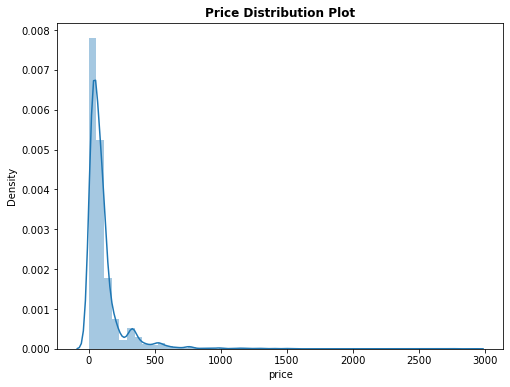

In [66]:
# Plot distribusi fitur 'price'
plt.figure(figsize=(8, 6))
sns.distplot(df_hb['price'])
plt.title('Price Distribution Plot', size=12, weight='bold');

In [67]:
df_hb[df_hb['price'] > 112.8]['price'].nunique()

352

Berdasarkan plot distribusi harga produk dengan kategori kesehatan dan kecantikan (health & beauty) , terlihat bahwa terdapat 'right-skewed distribution'. Dengan kata lain, terdapat skewness positif pada fitur `price`. Distribusi data tersebut dapat ditangani dengan metode Log Transform.

In [68]:
df_hb['log price'] = df_hb['price'].apply(lambda x:np.log(x))
df_hb[['price','log price']]

,price,log price
21,109.90,4.699571
22,79.99,4.381902
46,14.49,2.673459
94,19.99,2.995232
117,13.99,2.638343
...,...,...
113378,249.90,5.521061
113388,30.99,3.433665
113390,57.99,4.060271
113401,37.90,3.634951


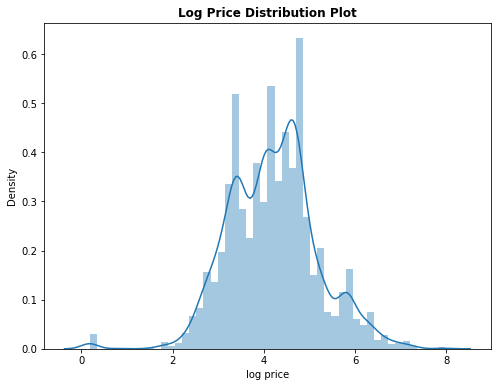

In [69]:
#price distribution with log transform
plt.figure(figsize=(8, 6))
sns.distplot(df_hb['log price'])
plt.title('Log Price Distribution Plot', size=12, weight='bold');

<AxesSubplot:xlabel='price'>

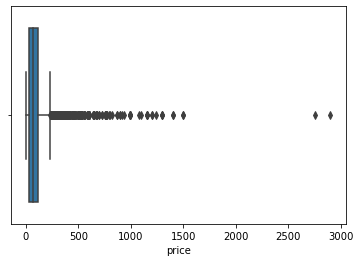

In [70]:
# boxplot fitur price

sns.boxplot(df_hb['price'])

In [71]:
price_bining = pd.cut(df_hb['price'], bins=10)
price_bining

21        (-1.698, 290.98]
22        (-1.698, 290.98]
46        (-1.698, 290.98]
94        (-1.698, 290.98]
117       (-1.698, 290.98]
                ...       
113378    (-1.698, 290.98]
113388    (-1.698, 290.98]
113390    (-1.698, 290.98]
113401    (-1.698, 290.98]
113419    (-1.698, 290.98]
Name: price, Length: 4204, dtype: category
Categories (10, interval[float64, right]): [(-1.698, 290.98] < (290.98, 580.76] < (580.76, 870.54] < (870.54, 1160.32] ... (1739.88, 2029.66] < (2029.66, 2319.44] < (2319.44, 2609.22] < (2609.22, 2899.0]]

In [72]:
price_bining.value_counts().sort_index()

(-1.698, 290.98]      3843
(290.98, 580.76]       285
(580.76, 870.54]        48
(870.54, 1160.32]       16
(1160.32, 1450.1]        8
(1450.1, 1739.88]        2
(1739.88, 2029.66]       0
(2029.66, 2319.44]       0
(2319.44, 2609.22]       0
(2609.22, 2899.0]        2
Name: price, dtype: int64

In [73]:
pd.crosstab(price_bining, columns = 'count')

col_0,count
price,
"(-1.698, 290.98]",3843
"(290.98, 580.76]",285
"(580.76, 870.54]",48
"(870.54, 1160.32]",16
"(1160.32, 1450.1]",8
"(1450.1, 1739.88]",2
"(2609.22, 2899.0]",2


#### **Distribution of Product Volume**

In [74]:
df_hb['product_volume'].describe()

count      4204.000000
mean       7674.315414
std       19997.370376
min         352.000000
25%        2520.000000
50%        4096.000000
75%        6300.000000
max      251625.000000
Name: product_volume, dtype: float64

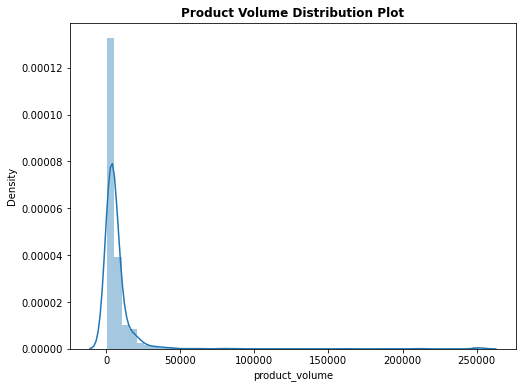

In [75]:
# Plot distribusi fitur 'product_volume'
plt.figure(figsize=(8, 6))
sns.distplot(df_hb['product_volume'])
plt.title('Product Volume Distribution Plot', size=12, weight='bold');

Berdasarkan plot distribusi volume produk dengan kategori kesehatan dan kecantikan (health & beauty) , terlihat bahwa terdapat 'right-skewed distribution'. Dengan kata lain, terdapat skewness positif pada fitur `product_volume`. Distribusi data tersebut dapat ditangani dengan metode Log Transform.

In [76]:
df_hb['log product_volume'] = df_hb['product_volume'].apply(lambda x:np.log(x))
df_hb[['product_volume','log product_volume']]

,product_volume,log product_volume
21,4368.0,8.382061
22,3960.0,8.283999
46,6300.0,8.748305
94,4500.0,8.411833
117,3750.0,8.229511
...,...,...
113378,7866.0,8.970305
113388,1024.0,6.931472
113390,2964.0,7.994295
113401,945.0,6.851185


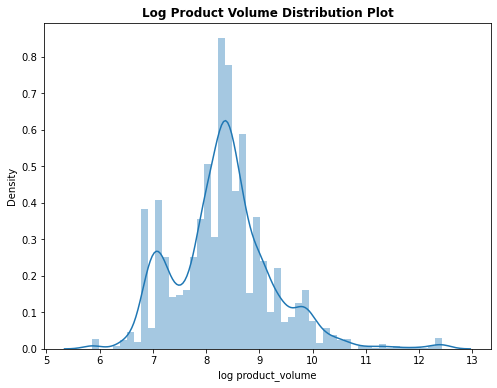

In [77]:
#product volume distribution with log transform
plt.figure(figsize=(8, 6))
sns.distplot(df_hb['log product_volume'])
plt.title('Log Product Volume Distribution Plot', size=12, weight='bold');

Selanjutnya, kita akan mengecek distribusi data dan outliers untuk tiap numerikal fitur. Jika distribusinya memiliki skewness yang tinggi seperti fitur `price` dan `product_volume` di atas, salah satu cara yang dapat kita lakukan untuk menguranginya adalah dengan melakukan rekayasa pada tiap fiturnya.

####**Outliers Detection**

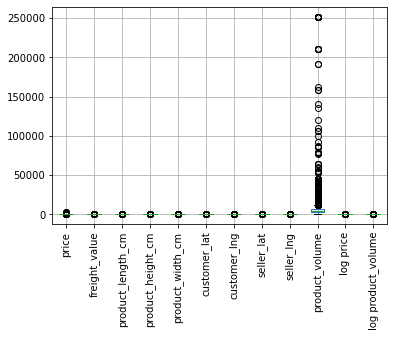

In [78]:
# Plot boxplot untuk mengecek outliers fitur numerikal
df_hb.boxplot(rot=90);

Terdapat cukup banyak titik-titik outlier di sekitar area nilai maksimum pada kolom `product_volume`, artinya kolom ini memiliki variasi nilai yang cukup tinggi.

Selanjutnya, kita coba identifikasi outliers dengan menggunakan IQR (Interquartile Range). Kita ingin mengetahui limit atas dan limit bawah pada fitur-fitur yang terdeteksi adanya outlier. Suatu data dianggap outlier jika nilainya di bawah Q1 - 1,5 x IQR atau di atas Q3 + 1,5 x IQR.

In [79]:
# Membuat fungsi untuk mengecek outliers
def find_anomalies(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    limit = iqr*1.5
    print(f'IQR: {iqr}')

    limit_bawah = q1 - limit
    limit_atas = q3 + limit
    print(f'limit_bawah: {limit_bawah}')
    print(f'limit_atas: {limit_atas}')  

In [80]:
# Outliers pada fitur 'product_volume'
find_anomalies(df_hb['product_volume'])

IQR: 3780.0
limit_bawah: -3150.0
limit_atas: 11970.0


In [81]:
# Cek product volume > 11970
df_hb[df_hb['product_volume'] > 11970].count()['product_volume']

477

In [82]:
# Outliers pada fitur price
find_anomalies(df_hb['price'])

IQR: 80.97
limit_bawah: -89.555
limit_atas: 234.325


In [83]:
# Cek price > 234.325
df_hb[df_hb['price'] > 234.325].count()['price']

412

Berdasarkan tabel deskripsi statistik di atas sebelumnya, range volume produk diketahui sebesar 251,27 liter. Nilai kuartil ketiga (75% data) pada kolom `product_volume` hanya sebesar 6,3 liter, sedangkan nilai maksimumnya adalah 251,62 liter, hampir 40 kali lipatnya. Selanjutnya, untuk range harga produk juga sangat tinggi yaitu sebesar ~2900 dollars, mendekati nilai maksimumnya. Sedangkan nilai kuartil ketiga (75% data) pada kolom `price` sebesar 112,87 dollars, ~26 kali lipat dari harga maksimum. Sehingga, kita bisa menyimpulkan bahwa data ini terdistribusi sangat condong ka kanan (*right/positive skewness*).

Terdapat 477 data yang memiliki volume produk lebih besar dari 11.970 cm kubik (limit atas) dan 422 data yang memiliki harga lebih besar dari ~234 dollars (limit atas). Persentase data yang memiliki nilai > limit atas dari metode IQR cukup besar, yaitu lebih dari 10% dataset. Oleh karena keterbatasan data, seluruh data ini akan ditangani dengan metode log transform agar dapat dimasukkan ke dalam pemodelan, sehingga skewness-nya pun akan berkurang. Hal ini tentu akan menjadi limitasi untuk model yang nantinya dibangun.

Berikutnya, mari kita visualisasikan missing values/data yang hilang pada dataframe kita dengan menggunakan library missingno.

Reference :
https://towardsdatascience.com/using-the-missingno-python-library-to-identify-and-visualise-missing-data-prior-to-machine-learning-34c8c5b5f009
https://github.com/ResidentMario/missingno

####**Missing Values Detection**

<AxesSubplot:>

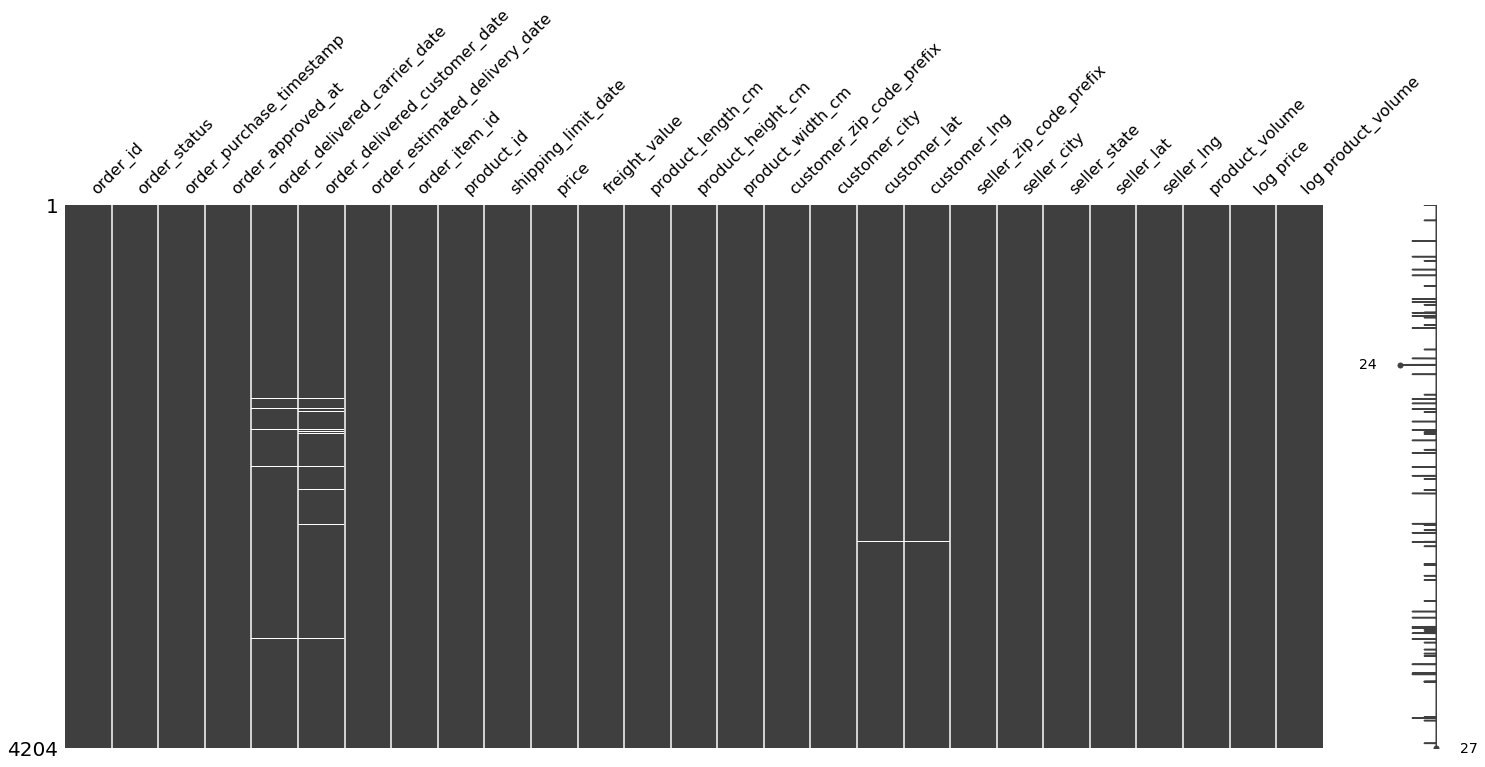

In [84]:
import missingno
missingno.matrix(df_hb)

Terlihat bahwa missing value/data pada kolom  `order_delivered_carrier_date`, `order_delivered_customer_date`, `customer_lat`, dan `customer_lng` memiliki jumlah yang sangat kecil (< 2%). Selain itu, ternyata pola persebaran missing value-nya pun kurang lebih sama. Jika `order_delivered_carrier_date` tidak ada datanya, maka `order_delivered_customer_date` pun tidak ada. Begitu juga missing value pada kordinat latitude dan longitude alamat customer, jika `customer_lat` tidak ada datanya, maka `customer_lng` pun tidak ada.

In [85]:
df_hb.to_csv('data health beauty.csv')

####**Product Volume Trends**

In [86]:
%%html
<div class='tableauPlaceholder' id='viz1663760736335' style='position: relative'><noscript><a href='#'><img alt='Product Volume Trends and Growth ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;ED&#47;EDA5_16637605639420&#47;Sheet1&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='EDA5_16637605639420&#47;Sheet1' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;ED&#47;EDA5_16637605639420&#47;Sheet1&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1663760736335');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

####**Order Status**

In [87]:
df_hb['order_status'].value_counts()

delivered     4125
shipped         38
canceled        22
invoiced        12
processing       7
Name: order_status, dtype: int64

In [88]:
df_hb['order_status'].value_counts()/len(df_hb['order_status']) * 100

delivered     98.120837
shipped        0.903901
canceled       0.523311
invoiced       0.285442
processing     0.166508
Name: order_status, dtype: float64

In [89]:
df_hb_cancel = df_hb[df_hb['order_status'] == 'canceled']
df_hb_cancel

,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,shipping_limit_date,...,customer_lat,customer_lng,seller_zip_code_prefix,seller_city,seller_state,seller_lat,seller_lng,product_volume,log price,log product_volume
9890,5687ad45d33870c742b2cdacaf758353,canceled,2018-05-21 22:53:49,2018-05-22 02:15:44,NaT,NaT,2018-05-29,1,1b43b0a6105ffaa6dae01356daec2657,2018-05-24 02:15:44,...,-23.713053,-46.619916,9015.0,santo andre,SP,-23.665703,-46.518082,10800.0,4.060271,9.287301
9964,dabf2b0e35b423f94618bf965fcb7514,canceled,2016-10-09 00:56:52,2016-10-09 13:36:58,2016-10-13 13:36:59,2016-10-16 14:36:59,2016-11-30,2,7cd29da0653abeb444703cc5a957f479,2016-10-13 13:36:59,...,-23.659317,-46.745018,25645.0,petropolis,RJ,-22.549033,-43.210095,5100.0,3.910021,8.536996
13456,acfa87544c19d596707d25cf2f7dab61,canceled,2018-08-17 00:55:54,2018-08-18 00:50:11,NaT,NaT,2018-08-22,1,9b393d3360316521a943267765a47fbf,2018-08-21 00:50:11,...,-23.536841,-46.640393,4850.0,sao paulo,SP,-23.746253,-46.677002,3332.0,3.860519,8.111328
22826,2bc76dc101f9fa63d195e341cd11a649,canceled,2018-02-22 17:09:58,2018-02-22 17:28:45,NaT,NaT,2018-03-12,1,fe34a95208c5b3b69d91552aecf1bd71,2018-03-02 17:28:45,...,-23.725829,-46.692320,13088.0,campinas,SP,-22.847518,-47.035523,9248.0,3.254243,9.132163
26140,24c30ddeb5a4b85a61bbb58b9e3d66c9,canceled,2018-08-07 16:57:23,2018-08-09 03:35:18,NaT,NaT,2018-08-20,1,7174375d5bea2b7612929eae33df48d1,2018-08-20 03:35:18,...,-23.277114,-47.276588,8596.0,itaquaquecetuba,SP,-23.474699,-46.314808,2304.0,3.737670,7.742402
32695,2db84a082bda455eb1da10727e7ca621,canceled,2018-02-02 15:29:05,2018-02-02 16:00:26,2018-02-06 14:54:44,NaT,2018-02-20,1,4724ffa427f315c485e39b02e21859b2,2018-02-08 16:00:26,...,-23.650390,-46.802926,4782.0,sao paulo,SP,-23.693986,-46.701883,1584.0,2.484907,7.367709
41073,5627a31940ca40213ead4a6a71e7b386,canceled,2018-05-21 12:22:10,2018-05-21 15:34:08,NaT,NaT,2018-05-29,1,1b43b0a6105ffaa6dae01356daec2657,2018-05-23 15:31:49,...,-23.600179,-46.669657,9015.0,santo andre,SP,-23.665703,-46.518082,10800.0,4.060271,9.287301
43035,4c5e883786df8d555be4dc12f11d3fe7,canceled,2018-06-10 06:44:32,2018-06-12 04:57:32,NaT,NaT,2018-06-25,1,615ee56e97eef79c2b855111d9434dcf,2018-06-18 04:57:32,...,-22.599254,-47.379810,3702.0,sao paulo,SP,-23.516747,-46.548182,5100.0,4.725882,8.536996
49549,e2557098c56afd06a929b32a63b5f856,canceled,2018-03-01 15:20:13,2018-03-02 10:15:22,NaT,NaT,2018-03-15,1,388a6943ef1d99b81f642a0137bfa5da,2018-03-09 10:15:22,...,-23.737610,-46.393708,9015.0,santo andre,SP,-23.665703,-46.518082,9000.0,4.553772,9.104980
52297,83630f2412ec5ad7dc40991d1225e93c,canceled,2018-08-14 15:26:11,2018-08-14 15:44:11,NaT,NaT,2018-08-24,1,7174375d5bea2b7612929eae33df48d1,2018-08-23 15:44:11,...,-23.529736,-46.793052,8596.0,itaquaquecetuba,SP,-23.474699,-46.314808,2304.0,3.737670,7.742402


In [90]:
df_hb_cancel['price'].sum()

1831.13

In [91]:
# cek dataframe dengan data kosong pada 'order_delivered_carrier_date'
df_hb[df_hb['order_delivered_carrier_date'].isna()]

,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,shipping_limit_date,...,customer_lat,customer_lng,seller_zip_code_prefix,seller_city,seller_state,seller_lat,seller_lng,product_volume,log price,log product_volume
6878,360787554f41824600bdcba9687cd4f0,invoiced,2018-03-23 19:39:46,2018-03-23 19:50:29,NaT,NaT,2018-04-16,1,679d1a26cc192f14e7e30ae397f8b089,2018-03-29 19:50:29,...,-23.644453,-46.700075,35570.0,formiga,MG,-20.474084,-45.424321,3000.0,6.765927,8.006368
6879,360787554f41824600bdcba9687cd4f0,invoiced,2018-03-23 19:39:46,2018-03-23 19:50:29,NaT,NaT,2018-04-16,2,679d1a26cc192f14e7e30ae397f8b089,2018-03-29 19:50:29,...,-23.644453,-46.700075,35570.0,formiga,MG,-20.474084,-45.424321,3000.0,6.765927,8.006368
9890,5687ad45d33870c742b2cdacaf758353,canceled,2018-05-21 22:53:49,2018-05-22 02:15:44,NaT,NaT,2018-05-29,1,1b43b0a6105ffaa6dae01356daec2657,2018-05-24 02:15:44,...,-23.713053,-46.619916,9015.0,santo andre,SP,-23.665703,-46.518082,10800.0,4.060271,9.287301
13456,acfa87544c19d596707d25cf2f7dab61,canceled,2018-08-17 00:55:54,2018-08-18 00:50:11,NaT,NaT,2018-08-22,1,9b393d3360316521a943267765a47fbf,2018-08-21 00:50:11,...,-23.536841,-46.640393,4850.0,sao paulo,SP,-23.746253,-46.677002,3332.0,3.860519,8.111328
14686,d9d6c371c6721e2fb73fc7ed7b5cc856,processing,2017-08-25 17:50:50,2017-08-25 18:08:20,NaT,NaT,2017-09-26,1,f1f41c991881dc3d4cbcedade3ec1622,2017-09-08 18:08:20,...,-23.008964,-47.027385,22790.0,04482255,RJ,-23.011335,-43.450256,11132.0,5.991215,9.317579
19126,9191e958cc19129b8470df9d933f8e3c,invoiced,2017-11-30 19:12:28,2017-12-01 09:31:11,NaT,NaT,2017-12-20,1,d245838e3d0b2b51d751ccdc98885a8e,2017-12-08 19:32:30,...,-23.257772,-45.825695,9015.0,santo andre,SP,-23.665703,-46.518082,4500.0,1.791759,8.411833
19987,e27f1bbffdd3f7fbcfe975311e0212df,invoiced,2017-05-13 10:00:58,2017-05-13 11:55:18,NaT,NaT,2017-05-31,1,c9f62bee5c17494edcb5c3f3f56d75ad,2017-05-18 11:55:18,...,-23.664503,-47.581761,11701.0,praia grande,SP,-24.011288,-46.418734,4368.0,5.075174,8.382061
22288,7e6a1834b0545ebda67a051d04ef8ca9,processing,2018-01-09 23:52:18,2018-01-10 10:31:51,NaT,NaT,2018-02-01,1,5c7236967f55c233f51e36e5126eaf7c,2018-01-17 10:09:32,...,-23.583489,-46.685081,15051.0,sao jose do rio pret,SP,-20.898877,-49.366140,9900.0,4.699571,9.200290
22826,2bc76dc101f9fa63d195e341cd11a649,canceled,2018-02-22 17:09:58,2018-02-22 17:28:45,NaT,NaT,2018-03-12,1,fe34a95208c5b3b69d91552aecf1bd71,2018-03-02 17:28:45,...,-23.725829,-46.692320,13088.0,campinas,SP,-22.847518,-47.035523,9248.0,3.254243,9.132163
26140,24c30ddeb5a4b85a61bbb58b9e3d66c9,canceled,2018-08-07 16:57:23,2018-08-09 03:35:18,NaT,NaT,2018-08-20,1,7174375d5bea2b7612929eae33df48d1,2018-08-20 03:35:18,...,-23.277114,-47.276588,8596.0,itaquaquecetuba,SP,-23.474699,-46.314808,2304.0,3.737670,7.742402


In [92]:
df_hb[df_hb['order_delivered_customer_date'].isna()]

,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,shipping_limit_date,...,customer_lat,customer_lng,seller_zip_code_prefix,seller_city,seller_state,seller_lat,seller_lng,product_volume,log price,log product_volume
46,ee64d42b8cf066f35eac1cf57de1aa85,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,NaT,2018-06-28,1,c50ca07e9e4db9ea5011f06802c0aea0,2018-06-13 04:30:33,...,-23.175897,-46.886594,11701.0,praia grande,SP,-24.011288,-46.418734,6300.0,2.673459,8.748305
2623,195070d2d0eb1da7d93b958bce36d1ef,shipped,2017-02-08 05:56:31,2017-02-10 03:03:30,2017-02-15 09:14:40,NaT,2017-03-10,1,154e7e31ebfa092203795c972e5804a6,2017-02-15 05:56:31,...,-23.442174,-47.454934,9015.0,santo andre,SP,-23.665703,-46.518082,4500.0,2.995232,8.411833
6878,360787554f41824600bdcba9687cd4f0,invoiced,2018-03-23 19:39:46,2018-03-23 19:50:29,NaT,NaT,2018-04-16,1,679d1a26cc192f14e7e30ae397f8b089,2018-03-29 19:50:29,...,-23.644453,-46.700075,35570.0,formiga,MG,-20.474084,-45.424321,3000.0,6.765927,8.006368
6879,360787554f41824600bdcba9687cd4f0,invoiced,2018-03-23 19:39:46,2018-03-23 19:50:29,NaT,NaT,2018-04-16,2,679d1a26cc192f14e7e30ae397f8b089,2018-03-29 19:50:29,...,-23.644453,-46.700075,35570.0,formiga,MG,-20.474084,-45.424321,3000.0,6.765927,8.006368
9890,5687ad45d33870c742b2cdacaf758353,canceled,2018-05-21 22:53:49,2018-05-22 02:15:44,NaT,NaT,2018-05-29,1,1b43b0a6105ffaa6dae01356daec2657,2018-05-24 02:15:44,...,-23.713053,-46.619916,9015.0,santo andre,SP,-23.665703,-46.518082,10800.0,4.060271,9.287301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100489,ca7296a83aa279afb28c2388a4f48891,canceled,2018-02-07 09:48:08,2018-02-07 10:10:17,2018-02-08 23:26:57,NaT,2018-03-07,1,2b4609f8948be18874494203496bc318,2018-02-15 10:10:17,...,-22.032325,-48.909205,9015.0,santo andre,SP,-23.665703,-46.518082,3960.0,4.499699,8.283999
106933,f380f2af4b81c39da36a06a133dd12c8,shipped,2018-06-08 16:59:47,2018-06-08 20:32:05,2018-06-14 12:02:00,NaT,2018-07-05,1,bbe4dfe43d77a5d150ed30618b20db25,2018-06-14 20:27:59,...,-23.609786,-46.757401,28470.0,santo antonio de padua,RJ,-21.530634,-42.192998,5280.0,5.074549,8.571681
107093,2921ebd304831878ac888644314d424d,invoiced,2018-08-05 23:21:46,2018-08-07 04:55:24,NaT,NaT,2018-08-14,1,282dcadbd8c61f52f06a8ae802b54ee6,2018-08-13 04:55:24,...,-23.440079,-46.511449,8011.0,sao paulo,SP,-23.496404,-46.445106,12167.0,4.584967,9.406483
107409,c9f06c1229ec7cd4ec9aed55d434b499,canceled,2018-02-05 20:26:29,2018-02-05 20:49:48,2018-02-06 19:49:32,NaT,2018-03-01,1,8c292ca193d326152e335d77176746f0,2018-02-09 20:49:48,...,-21.253340,-48.328414,14403.0,franca,SP,-20.548228,-47.395897,2805.0,5.010635,7.939159


####**Orders by Hour**

In [93]:
# Orders by hour
order_by_hour = df_hb.groupby(df_hb['order_purchase_timestamp'].dt.hour)['order_id'].count().reset_index().sort_values(by='order_purchase_timestamp', ascending=False)
order_by_hour.rename(columns={"order_id":"Total Orders", "order_purchase_timestamp": "Hour of Day"}, inplace=True)

In [94]:
order_by_hour.head()

,Hour of Day,Total Orders
23,23,184
22,22,242
21,21,239
20,20,255
19,19,241


Text(0.5, 1.0, 'Total Orders by Hour')

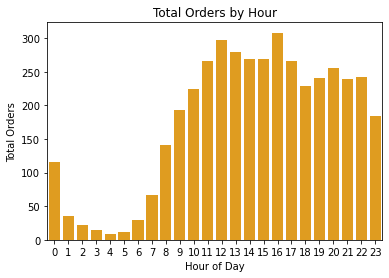

In [95]:
# Visualize data
ax = sns.barplot(x="Hour of Day", 
                 y="Total Orders", 
                 data=order_by_hour,
                 color = 'orange')
ax.set_title("Total Orders by Hour")

In [96]:
# Orders by day of the week
order_by_day = df_hb.groupby(df_hb["order_purchase_timestamp"].dt.day_name())["order_id"].count().reset_index()

order_by_day.rename(columns={"order_id":"Total Orders", "order_purchase_timestamp": "Weekday Name"}, inplace=True)

order_by_day = order_by_day.sort_values(by="Total Orders", ascending=False)

Text(0.5, 1.0, 'Total Orders by Day')

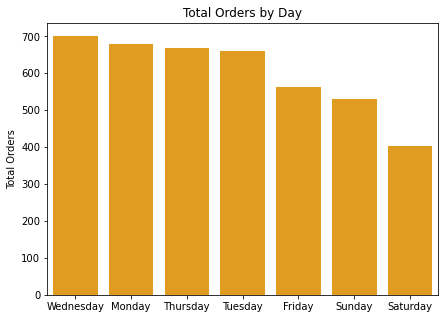

In [97]:
plt.figure(figsize = (7,5))
ax = sns.barplot(x="Weekday Name", 
                 y="Total Orders", 
                 data=order_by_day,
                 color='orange')
ax.set_xlabel('')
ax.set_title("Total Orders by Day")

####**Relationship between Seller City and Time to Pick**

In [98]:
# define time to pick in Days
df_hb["TimeToPickinHours"] = (df_hb["order_delivered_carrier_date"] - df_hb["order_purchase_timestamp"])
df_hb["TimeToPickinHours"] = df_hb["TimeToPickinHours"].apply(lambda x: x.total_seconds())
df_hb["TimeToPickinHours"] = round((df_hb["TimeToPickinHours"] / 3600) / 24, 2)
df_hb.rename(columns={"TimeToPickinHours" : "TimeToPickinDays"}, inplace=True)

In [99]:
df_hb[["TimeToPickinDays"]].describe()

,TimeToPickinDays
count,4169.000000
mean,3.063408
std,3.516241
min,-0.030000
25%,1.090000
50%,2.080000
75%,3.890000
max,53.210000


In [100]:
# best picktime
pick_time = df_hb.groupby(["seller_city", "seller_state"])["TimeToPickinDays"].agg(["min", "max", "mean", "std", "count"]).dropna().sort_values("mean").reset_index()

# Filter for sellers with 30 or more orders in their history
pick_time = pick_time[pick_time["count"]>=30]

In [101]:
fastest_pick = pick_time[:10]
slowest_pick = pick_time.sort_values("mean", ascending=False)[:10]

In [102]:
fastest_pick

,seller_city,seller_state,min,max,mean,std,count
18,teresopolis,RJ,0.04,3.74,1.421395,1.072679,43
21,lencois paulista,SP,0.01,4.72,1.491667,1.167661,36
26,franca,SP,-0.01,5.14,1.626786,1.198976,84
33,londrina,PR,0.04,5.35,1.806129,1.181740,62
37,rio de janeiro,RJ,-0.03,5.24,1.905614,1.359301,114
38,birigui,SP,0.10,4.28,1.955000,1.168711,34
49,formiga,MG,0.42,5.80,2.166364,1.806270,33
50,belo horizonte,MG,0.40,11.50,2.194062,2.014196,32
54,sao jose do rio preto,SP,0.26,8.75,2.314222,1.792283,45
55,vicente de carvalho,SP,0.09,7.96,2.326122,1.798701,49


In [103]:
# slowest delivery sellers
slowest_pick

,seller_city,seller_state,min,max,mean,std,count
123,bombinhas,SC,0.83,26.04,7.608000,7.602114,30
119,viamao,RS,0.71,24.01,5.932581,5.392482,31
118,curitiba,PR,0.08,53.21,5.808625,11.670601,80
116,sao luis,MA,0.03,21.41,5.675954,5.604528,131
111,ribeirao preto,SP,0.17,17.84,4.492571,3.313037,105
103,indaiatuba,SP,0.10,11.25,3.931034,2.735875,58
101,guarulhos,SP,0.05,25.97,3.891136,5.314402,88
89,salto,SP,0.52,6.89,3.282222,1.810928,54
88,hortolandia,SP,0.03,10.98,3.258421,2.285594,228
86,sao paulo,SP,-0.02,33.99,3.224190,3.614795,907


In [104]:
df_health_beauty = df_hb.copy()
df_health_beauty

,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,shipping_limit_date,...,customer_lng,seller_zip_code_prefix,seller_city,seller_state,seller_lat,seller_lng,product_volume,log price,log product_volume,TimeToPickinDays
21,203096f03d82e0dffbc41ebc2e2bcfb7,delivered,2017-09-18 14:31:30,2017-09-19 04:04:09,2017-10-06 17:50:03,2017-10-09 22:23:46,2017-09-28,1,5ac9d9e379c606e36a8094a6046f75dc,2017-09-25 04:04:09,...,-46.652000,4438.0,sao paulo,SP,-23.677741,-46.668647,4368.0,4.699571,8.382061,18.14
22,f848643eec1d69395095eb3840d2051e,delivered,2018-03-15 08:52:40,2018-03-15 09:09:31,2018-03-15 19:52:48,2018-03-19 18:08:32,2018-03-29,1,2b4609f8948be18874494203496bc318,2018-03-23 09:09:31,...,-46.635022,9015.0,santo andre,SP,-23.665703,-46.518082,3960.0,4.381902,8.283999,0.46
46,ee64d42b8cf066f35eac1cf57de1aa85,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,NaT,2018-06-28,1,c50ca07e9e4db9ea5011f06802c0aea0,2018-06-13 04:30:33,...,-46.886594,11701.0,praia grande,SP,-24.011288,-46.418734,6300.0,2.673459,8.748305,0.91
94,b8801cccd8068de30112e4f49903d74a,delivered,2017-07-30 03:06:35,2017-07-30 03:25:08,2017-07-31 16:42:54,2017-08-01 14:27:31,2017-08-16,1,154e7e31ebfa092203795c972e5804a6,2017-08-08 03:25:08,...,-46.362737,9015.0,santo andre,SP,-23.665703,-46.518082,4500.0,2.995232,8.411833,1.57
117,a5474c0071dd5d1074e12d417078bbd0,delivered,2018-07-30 22:41:44,2018-08-01 02:50:15,2018-08-02 10:35:00,2018-08-03 19:28:47,2018-08-02,1,1f75be631e988bb0ad750e60e18d043b,2018-08-03 02:50:15,...,-46.883100,4208.0,sao paulo,SP,-23.584615,-46.601932,3750.0,2.638343,8.229511,2.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113378,0fa1fab1d7c1211c824596ed5e111e3c,delivered,2018-03-13 21:48:57,2018-03-13 22:40:28,2018-03-14 19:27:23,2018-04-05 19:59:49,2018-04-02,1,149de4383ccb1829ea75380fc5f0b5fa,2018-03-19 22:30:45,...,-46.591280,25645.0,petropolis,RJ,-22.549033,-43.210095,7866.0,5.521061,8.970305,0.90
113388,c2af225ac9a68a3c24500aa6fab006aa,delivered,2018-08-20 10:04:30,2018-08-20 14:53:46,2018-08-22 13:16:00,2018-08-27 21:44:45,2018-08-28,1,dc6fe08afddfeb23ce334ce4cf5890eb,2018-08-22 14:53:46,...,-46.686381,14085.0,ribeirao preto,SP,-21.168504,-47.793705,1024.0,3.433665,6.931472,2.13
113390,87b4c933f31145a28413b39d880ad6c3,delivered,2018-03-02 17:12:05,2018-03-02 17:49:24,2018-03-06 21:23:32,2018-03-16 17:21:55,2018-03-21,1,cbaf5898b92064cd5e399c7cff291d0a,2018-03-08 17:31:06,...,-46.619002,65072.0,sao luis,MA,-2.546079,-44.308986,2964.0,4.060271,7.994295,4.17
113401,1b4a0e6b19d0034b531655b41ea89623,delivered,2017-10-02 08:45:35,2017-10-02 08:56:53,2017-10-03 20:26:19,2017-10-06 16:58:25,2017-10-24,1,9e10ae46a3021a02f1692448ef9fa1db,2017-10-06 08:56:53,...,-46.371265,12243.0,sao jose dos campos,SP,-23.201781,-45.895670,945.0,3.634951,6.851185,1.49


In [105]:
df_health_beauty.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4204 entries, 21 to 113419
Data columns (total 28 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       4204 non-null   object        
 1   order_status                   4204 non-null   object        
 2   order_purchase_timestamp       4204 non-null   datetime64[ns]
 3   order_approved_at              4204 non-null   datetime64[ns]
 4   order_delivered_carrier_date   4169 non-null   datetime64[ns]
 5   order_delivered_customer_date  4126 non-null   datetime64[ns]
 6   order_estimated_delivery_date  4204 non-null   datetime64[ns]
 7   order_item_id                  4204 non-null   object        
 8   product_id                     4204 non-null   object        
 9   shipping_limit_date            4204 non-null   datetime64[ns]
 10  price                          4204 non-null   float64       
 11  freight_value 

In [106]:
df_health_beauty = df_health_beauty[df_health_beauty['order_status'] == 'delivered']
df_health_beauty

,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,shipping_limit_date,...,customer_lng,seller_zip_code_prefix,seller_city,seller_state,seller_lat,seller_lng,product_volume,log price,log product_volume,TimeToPickinDays
21,203096f03d82e0dffbc41ebc2e2bcfb7,delivered,2017-09-18 14:31:30,2017-09-19 04:04:09,2017-10-06 17:50:03,2017-10-09 22:23:46,2017-09-28,1,5ac9d9e379c606e36a8094a6046f75dc,2017-09-25 04:04:09,...,-46.652000,4438.0,sao paulo,SP,-23.677741,-46.668647,4368.0,4.699571,8.382061,18.14
22,f848643eec1d69395095eb3840d2051e,delivered,2018-03-15 08:52:40,2018-03-15 09:09:31,2018-03-15 19:52:48,2018-03-19 18:08:32,2018-03-29,1,2b4609f8948be18874494203496bc318,2018-03-23 09:09:31,...,-46.635022,9015.0,santo andre,SP,-23.665703,-46.518082,3960.0,4.381902,8.283999,0.46
94,b8801cccd8068de30112e4f49903d74a,delivered,2017-07-30 03:06:35,2017-07-30 03:25:08,2017-07-31 16:42:54,2017-08-01 14:27:31,2017-08-16,1,154e7e31ebfa092203795c972e5804a6,2017-08-08 03:25:08,...,-46.362737,9015.0,santo andre,SP,-23.665703,-46.518082,4500.0,2.995232,8.411833,1.57
117,a5474c0071dd5d1074e12d417078bbd0,delivered,2018-07-30 22:41:44,2018-08-01 02:50:15,2018-08-02 10:35:00,2018-08-03 19:28:47,2018-08-02,1,1f75be631e988bb0ad750e60e18d043b,2018-08-03 02:50:15,...,-46.883100,4208.0,sao paulo,SP,-23.584615,-46.601932,3750.0,2.638343,8.229511,2.50
150,01855f880aae9a984c7c33b26fcf2e02,delivered,2017-10-19 15:08:48,2017-10-19 15:35:35,2017-10-23 13:14:16,2017-10-24 15:57:46,2017-10-31,1,12bc892d6fff0dc42c8177f3665ef00e,2017-10-25 15:35:35,...,-46.723205,11701.0,praia grande,SP,-24.011288,-46.418734,4368.0,3.676047,8.382061,3.92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113378,0fa1fab1d7c1211c824596ed5e111e3c,delivered,2018-03-13 21:48:57,2018-03-13 22:40:28,2018-03-14 19:27:23,2018-04-05 19:59:49,2018-04-02,1,149de4383ccb1829ea75380fc5f0b5fa,2018-03-19 22:30:45,...,-46.591280,25645.0,petropolis,RJ,-22.549033,-43.210095,7866.0,5.521061,8.970305,0.90
113388,c2af225ac9a68a3c24500aa6fab006aa,delivered,2018-08-20 10:04:30,2018-08-20 14:53:46,2018-08-22 13:16:00,2018-08-27 21:44:45,2018-08-28,1,dc6fe08afddfeb23ce334ce4cf5890eb,2018-08-22 14:53:46,...,-46.686381,14085.0,ribeirao preto,SP,-21.168504,-47.793705,1024.0,3.433665,6.931472,2.13
113390,87b4c933f31145a28413b39d880ad6c3,delivered,2018-03-02 17:12:05,2018-03-02 17:49:24,2018-03-06 21:23:32,2018-03-16 17:21:55,2018-03-21,1,cbaf5898b92064cd5e399c7cff291d0a,2018-03-08 17:31:06,...,-46.619002,65072.0,sao luis,MA,-2.546079,-44.308986,2964.0,4.060271,7.994295,4.17
113401,1b4a0e6b19d0034b531655b41ea89623,delivered,2017-10-02 08:45:35,2017-10-02 08:56:53,2017-10-03 20:26:19,2017-10-06 16:58:25,2017-10-24,1,9e10ae46a3021a02f1692448ef9fa1db,2017-10-06 08:56:53,...,-46.371265,12243.0,sao jose dos campos,SP,-23.201781,-45.895670,945.0,3.634951,6.851185,1.49


In [107]:
df_health_beauty['order_item_id'].unique()

array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21'], dtype=object)

In [108]:
#rename and drop
df_health_beauty.rename(columns={"order_item_id": "quantity"}, inplace=True)
df_health_beauty.dropna(subset=['quantity'], inplace=True)

In [109]:
df_health_beauty['quantity'] = df_health_beauty['quantity'].astype(int)

In [110]:
list_df = ['order_id', 'order_status', 'order_purchase_timestamp', 'order_approved_at', 
            'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']

df_health_beauty = df_health_beauty.groupby(list_df).agg({'quantity':'max', 'price':'sum', 'product_volume':'sum'}).reset_index()
df_health_beauty

,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,quantity,price,product_volume
0,0005a1a1728c9d785b8e2b08b904576c,delivered,2018-03-19 18:40:33,2018-03-20 18:35:21,2018-03-28 00:37:42,2018-03-29 18:17:31,2018-03-29,1,145.95,5760.0
1,00061f2a7bc09da83e415a52dc8a4af1,delivered,2018-03-24 22:16:10,2018-03-24 22:28:09,2018-03-27 05:26:55,2018-03-29 00:04:19,2018-04-09,1,59.99,17500.0
2,001d8f0e34a38c37f7dba2a37d4eba8b,delivered,2017-05-14 17:19:44,2017-05-14 17:35:11,2017-05-24 15:45:01,2017-05-26 13:14:50,2017-05-24,2,37.98,15652.0
3,0029c5db35ef291ce99d1262012e7daa,delivered,2018-08-25 00:09:40,2018-08-28 03:50:23,2018-08-29 13:24:00,2018-08-30 18:34:37,2018-09-03,1,492.75,44460.0
4,00345f338696283410b7977d2e3efc89,delivered,2018-08-20 11:06:46,2018-08-20 15:12:10,2018-08-21 13:18:00,2018-08-30 21:13:48,2018-09-11,1,48.90,4845.0
...,...,...,...,...,...,...,...,...,...,...
3710,ffa2a7fdee9759a1c69f742f0a21d371,delivered,2018-02-11 14:23:30,2018-02-15 03:55:46,2018-02-16 02:04:41,2018-02-16 17:55:44,2018-02-26,1,29.90,1200.0
3711,ffa93f1bd7c0039af32324fa5d3cf1e6,delivered,2018-04-28 18:58:32,2018-04-28 19:11:04,2018-05-04 15:05:00,2018-05-08 16:25:49,2018-05-17,1,29.90,1200.0
3712,ffc1fd8337b12fe96a4c39a0c2991296,delivered,2017-05-03 16:51:47,2017-05-03 17:05:10,2017-05-04 15:03:06,2017-05-08 11:03:14,2017-06-02,1,14.90,10560.0
3713,ffec1a6d35149778ec575d5048d44db8,delivered,2018-03-20 12:47:53,2018-03-22 02:49:46,2018-03-27 17:06:34,2018-03-28 18:54:28,2018-04-02,1,47.65,3762.0


In [111]:
df_health_beauty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3715 entries, 0 to 3714
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       3715 non-null   object        
 1   order_status                   3715 non-null   object        
 2   order_purchase_timestamp       3715 non-null   datetime64[ns]
 3   order_approved_at              3715 non-null   datetime64[ns]
 4   order_delivered_carrier_date   3715 non-null   datetime64[ns]
 5   order_delivered_customer_date  3715 non-null   datetime64[ns]
 6   order_estimated_delivery_date  3715 non-null   datetime64[ns]
 7   quantity                       3715 non-null   int64         
 8   price                          3715 non-null   float64       
 9   product_volume                 3715 non-null   float64       
dtypes: datetime64[ns](5), float64(2), int64(1), object(2)
memory usage: 290.4+ KB


#### **EDA Summary**

- GMV produk health & beauty meningkat sejak dua tahun terakhir, dari September 2016 hanya 135 dollars (GMV dari 3 order yang berstatus delivered), hingga mencapai 50,596 dollars pada Agustus 2018 dari 414 order yang berstatus delivered, invoiced, processing, dan shipped.
- Pola visualisasi GMV dan jumlah produk yang di-order cukup sama. Hal ini menunjukkan, jumlah produk yang di-order sangat berpengaruh untuk menentukan GMV yang dihasilkan, sehingga secara keseluruhan dapat dipastikan bahwa setiap produk yang di-order setiap bulannya memiliki harga di sekitar rata-rata.
- Cancelation rate rendah, dengan persentase order yang berstatus cancelled di bawah 1%, sehingga tidak berpengaruh signifikan terhadap revenue opportunity loss. 
- Customer paling banyak melakukan transaksi pada waktu siang hingga sore hari, dengan transaksi pesanan terbanyak di jam 16, sedangkan transaksi paling sedikit dilakukan pada waktu dini hari (jam 1 - 5 pagi).
- Customer lebih sering melakukan transaksi pada hari kerja (weekdays), dengan transaksi terbanyak pada hari Rabu, dan lebih jarang melakukan transaksi di weekend.


**Modeling with Prophet**

In [112]:
import prophet
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_absolute_percentage_error


In [113]:
df_forecast = df_health_beauty[['order_purchase_timestamp','quantity','price','product_volume']]

In [114]:
#Buat Dataframe berisi seluruh tanggal dari awal data tanggal pembelian sampai akhir data tanggal pembelian
df_datetime = pd.DataFrame({'date':pd.date_range(start='2016-09-15', end='2018-08-29')})

df_datetime

,date
0,2016-09-15
1,2016-09-16
2,2016-09-17
3,2016-09-18
4,2016-09-19
...,...
709,2018-08-25
710,2018-08-26
711,2018-08-27
712,2018-08-28


In [115]:
# df_forecast = df[['order_purchase_timestamp','price']][((df['customer_state'] == 'SP') | (df['customer_state'] == 'MG') | (df['customer_state'] == 'RJ')) & (df['product_category_name'] == 'health beauty')]
df_forecast['order_purchase_timestamp'] = pd.to_datetime(df_forecast['order_purchase_timestamp']).dt.date
df_forecast['order_purchase_timestamp'] = pd.to_datetime(df_forecast['order_purchase_timestamp'])
df_forecast = df_forecast.groupby('order_purchase_timestamp').sum().reset_index().sort_values('order_purchase_timestamp')
df_forecast

,order_purchase_timestamp,quantity,price,product_volume
0,2016-09-15,3,134.97,12288.0
1,2016-10-04,3,206.80,15800.0
2,2016-10-06,1,40.90,3648.0
3,2016-10-07,3,275.77,17141.0
4,2016-10-10,2,230.90,32000.0
...,...,...,...,...
569,2018-08-25,8,1408.35,98214.0
570,2018-08-26,7,721.82,38469.0
571,2018-08-27,6,661.50,34120.0
572,2018-08-28,4,241.80,16136.0


In [116]:
#Merge dataframe df_datetime dengan data yang kita miliki
df_forecast = df_datetime.merge(df_forecast,how = 'left', left_on = 'date', right_on = 'order_purchase_timestamp')
df_forecast.drop(columns='order_purchase_timestamp',inplace=True)
df_forecast.fillna(0,inplace=True)
df_forecast.rename(columns={'date':'ds','price':'y'},inplace=True)

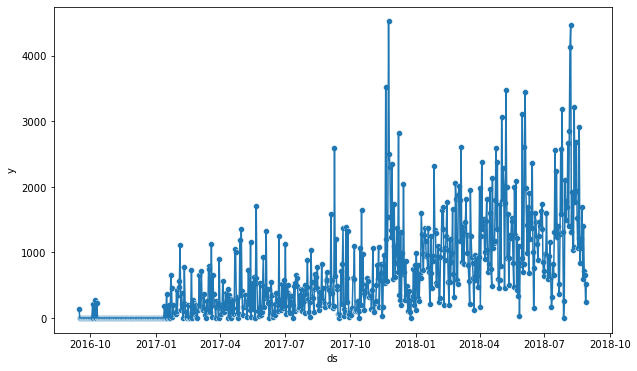

In [117]:
plt.figure(figsize=(10,6))
sns.lineplot(data=df_forecast,x = 'ds', y = 'y')
sns.scatterplot(data=df_forecast,x = 'ds', y = 'y')
plt.show()

Dilihat dari visualisasi diatas, banyak terdapat data kosong pada rentang Oktober-2016 sampai Januari-2017, sehingga yang akan kita gunakan untuk training model akan dimulai dari Februari-2017.
.

In [118]:
df_forecast = df_forecast[df_forecast['ds'] >= pd.to_datetime('2017-02-01')]

In [119]:
df_forecast.info()
df_forecast_qty = df_forecast[['ds','quantity']]
df_forecast_qty.rename(columns={'quantity':'y'},inplace=True)
df_forecast_price = df_forecast.drop(columns=['quantity','product_volume'])
df_forecast_volume = df_forecast.drop(columns=['quantity','y'])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 575 entries, 139 to 713
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   ds              575 non-null    datetime64[ns]
 1   quantity        575 non-null    float64       
 2   y               575 non-null    float64       
 3   product_volume  575 non-null    float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 22.5 KB


##**Forecast For Expected Revenue**##

###*Base Model (No Feature Engineering)*###

In [120]:
#Definisi Model & Fitting Model
m = prophet.Prophet()
#Model di fitting dengan parameter Hari libur di negara Brazil
m.add_country_holidays(country_name='BR')
m.fit(df_forecast_price)

15:41:49 - cmdstanpy - INFO - Chain [1] start processing
15:41:49 - cmdstanpy - INFO - Chain [1] done processing


In [121]:
#Nama-nama hari libur yang terdapat dalam library Prophet
m.train_holiday_names

0                                        Ano novo
1                                      Tiradentes
2                         Dia Mundial do Trabalho
3                         Independência do Brasil
4                         Nossa Senhora Aparecida
5                                         Finados
6                        Proclamação da República
7                                           Natal
8                               Sexta-feira Santa
9                                          Páscoa
10                                 Corpus Christi
11    Quarta-feira de cinzas (Início da Quaresma)
12                                       Carnaval
dtype: object

In [122]:
#Evaluasi Model
from prophet.diagnostics import cross_validation
df_cv = cross_validation(m,initial='545 days',period='7 days',horizon='7 days')
df_cv

  0%|          | 0/4 [00:00<?, ?it/s]

15:41:49 - cmdstanpy - INFO - Chain [1] start processing
15:41:49 - cmdstanpy - INFO - Chain [1] done processing
15:41:49 - cmdstanpy - INFO - Chain [1] start processing
15:41:49 - cmdstanpy - INFO - Chain [1] done processing
15:41:50 - cmdstanpy - INFO - Chain [1] start processing
15:41:50 - cmdstanpy - INFO - Chain [1] done processing
15:41:50 - cmdstanpy - INFO - Chain [1] start processing
15:41:50 - cmdstanpy - INFO - Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2018-08-02,1445.005686,701.477970,2129.351073,1690.40,2018-08-01
1,2018-08-03,1437.696504,759.838669,2163.211247,2670.90,2018-08-01
2,2018-08-04,1271.335343,563.736104,1951.745696,1396.59,2018-08-01
3,2018-08-05,1314.290664,586.036435,2004.390607,2854.91,2018-08-01
4,2018-08-06,1628.247637,935.924852,2352.117031,4142.48,2018-08-01
5,2018-08-07,1514.153023,807.850273,2193.618724,4475.12,2018-08-01
6,2018-08-08,1467.142256,766.049091,2145.494073,1316.38,2018-08-01
7,2018-08-09,1532.754833,783.243280,2257.508937,1929.41,2018-08-08
8,2018-08-10,1540.438751,806.097921,2279.888834,1033.31,2018-08-08
9,2018-08-11,1359.016587,606.556599,2090.653681,1082.50,2018-08-08


In [123]:
#Membuat Dataframe berisi Hasil Evaluasi Model
from prophet.plot import performance_metrics



df_p = performance_metrics(df_cv,rolling_window=1)

df_p

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,7 days,1.215900e+06,1102.678417,816.948771,0.729748,0.470457,0.488532,0.535714


Setelah dilakukan model evaluation, performa model didapati memiliki MAPE 73%.

###*Modeling With Log Transform*###

Dikarenakan performa model yang buruk pada saat model di fitting ke data Sales sebelumnya, kita akan mencoba melakukan Log Transform pada Data Sales dengan harapan mendapatkan angka Sales yang distribusinya lebih normal, sehingga mendapatkan performa model yang lebih baik.

In [124]:
#Melakukan Log Transform ke data Sales
df_forecast_log = df_forecast_price.copy()
df_forecast_log['y'] = df_forecast_log['y'].apply(lambda x:np.log(x+1))

In [125]:
df_forecast_log.set_index('ds',inplace=True)
df_forecast_log.sort_index()
df_forecast_log

,y
ds,
2017-02-01,5.881371
2017-02-02,6.150155
2017-02-03,6.327722
2017-02-04,7.011908
2017-02-05,4.835329
...,...
2018-08-25,7.250884
2018-08-26,6.583160
2018-08-27,6.496021


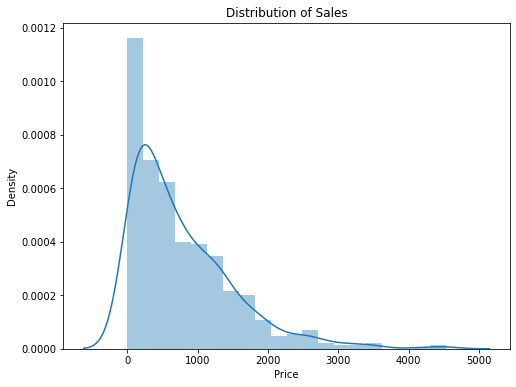

In [126]:
#Distribusi data Sales sebelum dilakukan Log Transform
plt.figure(figsize=(8,6))
sns.distplot(df_forecast['y'])
plt.xlabel('Price')
plt.title('Distribution of Sales')
plt.show()

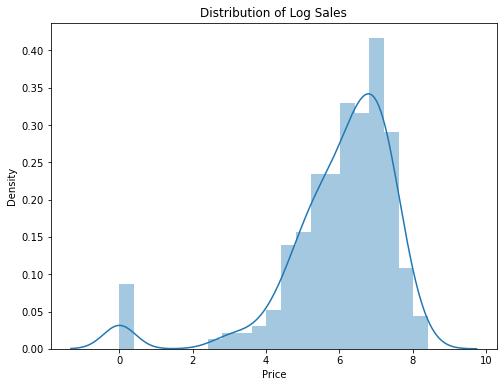

In [127]:
#Distribusi data Sales setelah dilakukan Log Transform
plt.figure(figsize=(8,6))
sns.distplot(df_forecast_log['y'])
plt.xlabel('Price')
plt.title('Distribution of Log Sales')
plt.show()

####*Cross Validation*####

In [128]:
#Definisi dan Fitting Model
m = prophet.Prophet()
m.add_country_holidays(country_name='BR')
m.fit(df_forecast_log.reset_index())

15:41:51 - cmdstanpy - INFO - Chain [1] start processing
15:41:51 - cmdstanpy - INFO - Chain [1] done processing


In [129]:
#Evaluasi Model
from prophet.diagnostics import cross_validation
df_cv = cross_validation(m,initial='545 days',period='7 days', horizon='7 days')
df_cv

  0%|          | 0/4 [00:00<?, ?it/s]

15:41:51 - cmdstanpy - INFO - Chain [1] start processing
15:41:51 - cmdstanpy - INFO - Chain [1] done processing
15:41:51 - cmdstanpy - INFO - Chain [1] start processing
15:41:51 - cmdstanpy - INFO - Chain [1] done processing
15:41:51 - cmdstanpy - INFO - Chain [1] start processing
15:41:51 - cmdstanpy - INFO - Chain [1] done processing
15:41:52 - cmdstanpy - INFO - Chain [1] start processing
15:41:52 - cmdstanpy - INFO - Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2018-08-02,7.187377,5.578451,8.846047,7.433312,2018-08-01
1,2018-08-03,7.188088,5.546382,8.715857,7.890545,2018-08-01
2,2018-08-04,6.879993,5.207605,8.479464,7.242505,2018-08-01
3,2018-08-05,7.127284,5.341767,8.619335,7.957146,2018-08-01
4,2018-08-06,7.661274,5.974333,9.257065,8.329291,2018-08-01
5,2018-08-07,7.411100,5.849592,9.067090,8.406512,2018-08-01
6,2018-08-08,7.493014,5.893418,9.114933,7.183400,2018-08-01
7,2018-08-09,7.264420,5.723516,8.943479,7.565488,2018-08-08
8,2018-08-10,7.273234,5.676249,8.914022,6.941490,2018-08-08
9,2018-08-11,6.960809,5.475375,8.483503,6.987952,2018-08-08


In [130]:
df_cv_trans = df_cv.copy()
df_cv_trans['yhat'] = df_cv_trans['yhat'].apply(lambda x:np.exp(x)-1)
df_cv_trans['y'] = df_cv_trans['y'].apply(lambda x:np.exp(x)-1)
df_cv_trans

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2018-08-02,1321.629319,5.578451,8.846047,1690.40,2018-08-01
1,2018-08-03,1322.569865,5.546382,8.715857,2670.90,2018-08-01
2,2018-08-04,971.619161,5.207605,8.479464,1396.59,2018-08-01
3,2018-08-05,1244.490027,5.341767,8.619335,2854.91,2018-08-01
4,2018-08-06,2123.461769,5.974333,9.257065,4142.48,2018-08-01
5,2018-08-07,1653.245797,5.849592,9.067090,4475.12,2018-08-01
6,2018-08-08,1794.455919,5.893418,9.114933,1316.38,2018-08-01
7,2018-08-09,1427.556662,5.723516,8.943479,1929.41,2018-08-08
8,2018-08-10,1440.203462,5.676249,8.914022,1033.31,2018-08-08
9,2018-08-11,1053.486775,5.475375,8.483503,1082.50,2018-08-08


In [131]:
#Hasil Evaluasi Model
from prophet.plot import performance_metrics


df_p = performance_metrics(df_cv_trans,rolling_window=1)

df_p.tail()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,7 days,1.313361e+06,1146.019672,905.587997,0.856904,0.441209,0.53358,0.0


Terlihat bahwa setelah di Log Transform, Model masih memiliki performa yang buruk, dengan MAPE 86.9%.

###*Forecast With Binning (Weekly)*###

Kita akan mencoba untuk melakukan Binning terhadap dataset yang dimiliki, dataset akan digabungkan menjadi data mingguan.

In [132]:
df_forecast_price_weekly = df_forecast_price.copy()
df_forecast_price_weekly

,ds,y
139,2017-02-01,357.30
140,2017-02-02,467.79
141,2017-02-03,558.88
142,2017-02-04,1108.77
143,2017-02-05,124.88
...,...,...
709,2018-08-25,1408.35
710,2018-08-26,721.82
711,2018-08-27,661.50
712,2018-08-28,241.80


In [133]:
df_forecast_price_weekly['year'] = df_forecast_price_weekly['ds'].dt.year
df_forecast_price_weekly['week of year'] = df_forecast_price_weekly['ds'].dt.weekofyear
df_forecast_price_weekly

,ds,y,year,week of year
139,2017-02-01,357.30,2017,5
140,2017-02-02,467.79,2017,5
141,2017-02-03,558.88,2017,5
142,2017-02-04,1108.77,2017,5
143,2017-02-05,124.88,2017,5
...,...,...,...,...
709,2018-08-25,1408.35,2018,34
710,2018-08-26,721.82,2018,34
711,2018-08-27,661.50,2018,35
712,2018-08-28,241.80,2018,35


In [134]:
df_forecast_price_weekly = df_forecast_price_weekly.groupby(['year','week of year']).agg({'ds':'max','y':'sum'})
df_forecast_price_weekly

ds         y
year week of year                     
2017 5            2017-02-05   2617.62
     6            2017-02-12   1716.54
     7            2017-02-19    469.07
     8            2017-02-26   1696.15
     9            2017-03-05   1493.27
...                      ...       ...
2018 31           2018-08-05  13992.56
     32           2018-08-12  17205.71
     33           2018-08-19  13113.61
     34           2018-08-26   7531.94
     35           2018-08-29   1426.05

[83 rows x 2 columns]

In [135]:
#Definisi Model & Fitting Model
m = prophet.Prophet()
#Model di fitting dengan parameter Hari libur di negara Brazil
m.add_country_holidays(country_name='BR')
m.fit(df_forecast_price_weekly)

15:41:52 - cmdstanpy - INFO - Chain [1] start processing
15:41:52 - cmdstanpy - INFO - Chain [1] done processing


####*Cross Validation*####

In [136]:
df_cv = cross_validation(m,initial='77 W',period='1 W',horizon='4 W')
df_cv

  0%|          | 0/1 [00:00<?, ?it/s]

15:41:53 - cmdstanpy - INFO - Chain [1] start processing
15:41:53 - cmdstanpy - INFO - Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2018-08-05,9749.781793,7209.487513,12307.672930,13992.56,2018-08-01
1,2018-08-12,9867.340531,7268.988198,12432.587162,17205.71,2018-08-01
2,2018-08-19,9984.899268,7326.422608,12609.401562,13113.61,2018-08-01
3,2018-08-26,10102.458006,7487.260263,12749.915410,7531.94,2018-08-01
4,2018-08-29,9533.511584,7066.456982,12266.312350,1426.05,2018-08-01


Dilihat dari hasil cross validation diatas, dikarenakan keterbatasan data, sehingga pada index ke 4 didapati data dengan range 3 hari (tanggal 26 - 29), sedangkan model kita di train untuk memprediksi data dengan range 7 hari. Sehingga data pada index ke 4 akan kita abaikan untuk kalkulasi hasil Cross Validation karena data tidak representatif.

In [137]:
df_p = performance_metrics(df_cv[:4],rolling_window=1)

df_p

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,25 days,2.206231e+07,4697.052987,4320.094103,0.327398,0.32225,0.365489,0.25


Setelah dilakukan Binning, performa model meningkat dengan MAPE menjadi 32.7%

###*Forecast With Binning (Monthly)*###

In [138]:
df_forecast_price_monthly = df_forecast_price.copy()
df_forecast_price_monthly

,ds,y
139,2017-02-01,357.30
140,2017-02-02,467.79
141,2017-02-03,558.88
142,2017-02-04,1108.77
143,2017-02-05,124.88
...,...,...
709,2018-08-25,1408.35
710,2018-08-26,721.82
711,2018-08-27,661.50
712,2018-08-28,241.80


In [139]:
#Buat Dataframe dengan data yang sudah Binning
df_forecast_price_monthly['period'] = df_forecast_price_monthly['ds'].dt.to_period('M')
df_forecast_price_monthly = df_forecast_price_monthly.groupby('period').agg({'ds':'max','y':'sum'})
df_forecast_price_monthly

,ds,y
period,,
2017-02,2017-02-28,6519.37
2017-03,2017-03-31,9434.53
2017-04,2017-04-30,8465.85
2017-05,2017-05-31,11745.98
2017-06,2017-06-30,10050.44
2017-07,2017-07-31,9977.02
2017-08,2017-08-31,12947.90
2017-09,2017-09-30,16269.09
2017-10,2017-10-31,12432.84


<AxesSubplot:xlabel='y', ylabel='Density'>

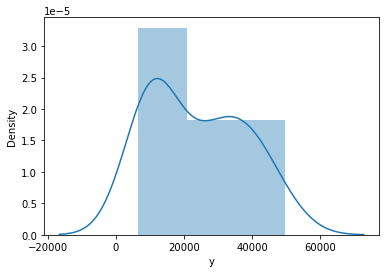

In [140]:
sns.distplot(df_forecast_price_monthly['y'])

Terlihat persebaran data untuk data bulanan cukup terdistribusi normal.

In [141]:
#Definisi Model & Fitting Model
m = prophet.Prophet()
#Model di fitting dengan parameter Hari libur di negara Brazil
m.add_country_holidays(country_name='BR')
m.fit(df_forecast_price_monthly)

15:41:53 - cmdstanpy - INFO - Chain [1] start processing
15:41:53 - cmdstanpy - INFO - Chain [1] done processing


####*Cross Validation*####

In [142]:
df_cv = cross_validation(m,initial='458 days',period='29 days',horizon='1 days')
df_cv

  0%|          | 0/3 [00:00<?, ?it/s]

15:41:53 - cmdstanpy - INFO - Chain [1] start processing
15:41:53 - cmdstanpy - INFO - Chain [1] done processing
15:41:54 - cmdstanpy - INFO - Chain [1] start processing
15:41:54 - cmdstanpy - INFO - Chain [1] done processing
15:41:54 - cmdstanpy - INFO - Chain [1] start processing
15:41:54 - cmdstanpy - INFO - Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2018-06-30,39107.999772,33930.952410,44135.296697,41407.70,2018-06-29
1,2018-07-31,42153.709961,37356.564913,47309.199992,35838.01,2018-07-30
2,2018-08-29,42686.104198,37832.451866,47664.054296,49676.60,2018-08-28


In [143]:
df_p = performance_metrics(df_cv,rolling_window=1)

df_p

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,1 days,3.134791e+07,5598.920095,5201.96533,0.124162,0.14072,0.123484,0.333333


Dengan Cross Validation model menggunakan data 3 bulan terakhir, didapati MAPE dengan data yang di binning secara bulanan sebesar 12.4%.

###*Modeling With Binning (Weekly) & Log Transform*###

In [144]:
df_forecast_price_weekly_log = df_forecast_price_weekly.copy()
df_forecast_price_weekly_log['y'] = df_forecast_price_weekly_log['y'].apply(lambda x:np.log(x))
df_forecast_price_weekly_log

ds         y
year week of year                     
2017 5            2017-02-05  7.870021
     6            2017-02-12  7.448066
     7            2017-02-19  6.150752
     8            2017-02-26  7.436116
     9            2017-03-05  7.308724
...                      ...       ...
2018 31           2018-08-05  9.546281
     32           2018-08-12  9.752997
     33           2018-08-19  9.481406
     34           2018-08-26  8.926908
     35           2018-08-29  7.262664

[83 rows x 2 columns]

<AxesSubplot:xlabel='y', ylabel='Density'>

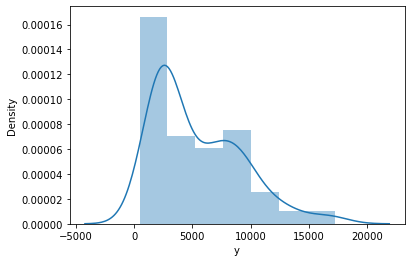

In [145]:
sns.distplot(df_forecast_price_weekly['y'])

<AxesSubplot:xlabel='y', ylabel='Density'>

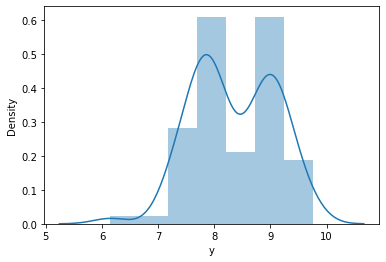

In [146]:
sns.distplot(df_forecast_price_weekly_log['y'])

Distribution Plot dari data sebelum dan sesudah dilakukan Log Transform, terlihat persebaran data pada data yang dilakukan Log Transform memiliki persebaran yang terlihat lebih mendekati normal.

In [147]:
#Definisi Model & Fitting Model
m = prophet.Prophet()
#Model di fitting dengan parameter Hari libur di negara Brazil
m.add_country_holidays(country_name='BR')
m.fit(df_forecast_price_weekly_log)

15:41:55 - cmdstanpy - INFO - Chain [1] start processing
15:41:55 - cmdstanpy - INFO - Chain [1] done processing


####*Cross Validation*####

In [148]:
df_cv = cross_validation(m,initial='77 W',period='1 W',horizon='4 W')
df_cv

  0%|          | 0/1 [00:00<?, ?it/s]

15:41:55 - cmdstanpy - INFO - Chain [1] start processing
15:41:55 - cmdstanpy - INFO - Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2018-08-05,9.343525,8.898981,9.808112,9.546281,2018-08-01
1,2018-08-12,9.369550,8.892418,9.820980,9.752997,2018-08-01
2,2018-08-19,9.395576,8.917699,9.900867,9.481406,2018-08-01
3,2018-08-26,9.421601,8.961707,9.897865,8.926908,2018-08-01
4,2018-08-29,1.785282,1.327849,2.233330,7.262664,2018-08-01


In [149]:
df_cv_trans = df_cv.copy()
df_cv_trans['y'] = df_cv_trans['y'].apply(lambda x:np.exp(x))
df_cv_trans['yhat'] = df_cv_trans['yhat'].apply(lambda x:np.exp(x))

df_cv_trans

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2018-08-05,11424.608823,8.898981,9.808112,13992.56,2018-08-01
1,2018-08-12,11725.840422,8.892418,9.820980,17205.71,2018-08-01
2,2018-08-19,12035.014567,8.917699,9.900867,13113.61,2018-08-01
3,2018-08-26,12352.340678,8.961707,9.897865,7531.94,2018-08-01
4,2018-08-29,5.961260,1.327849,2.233330,1426.05,2018-08-01


In [150]:
df_p = performance_metrics(df_cv_trans[:4],rolling_window=1)

df_p

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,25 days,1.525574e+07,3905.860169,3486.704217,0.306065,0.251007,0.287876,0.0


Didapati dengan kombinasi Binning & Log Transform MAPE model mencapai 30.6%

###*Forecast With Binning (Monthly) & Log Transform*###

In [151]:
df_forecast_price_monthly_log = df_forecast_price_monthly.copy()

In [152]:
df_forecast_price_monthly_log['y'] = df_forecast_price_monthly_log['y'].apply(lambda x:np.log(x))
df_forecast_price_monthly_log

,ds,y
period,,
2017-02,2017-02-28,8.782533
2017-03,2017-03-31,9.152132
2017-04,2017-04-30,9.043796
2017-05,2017-05-31,9.371266
2017-06,2017-06-30,9.215372
2017-07,2017-07-31,9.208040
2017-08,2017-08-31,9.468689
2017-09,2017-09-30,9.697022
2017-10,2017-10-31,9.428097


<AxesSubplot:xlabel='y', ylabel='Density'>

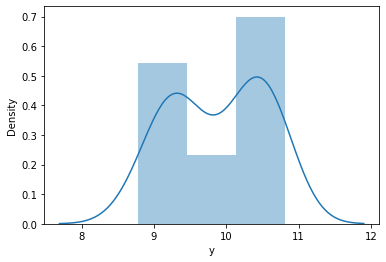

In [153]:
sns.distplot(df_forecast_price_monthly_log['y'])

In [154]:
#Definisi Model & Fitting Model
m = prophet.Prophet()
#Model di fitting dengan parameter Hari libur di negara Brazil
m.add_country_holidays(country_name='BR')
m.fit(df_forecast_price_monthly_log)

15:41:56 - cmdstanpy - INFO - Chain [1] start processing
15:41:56 - cmdstanpy - INFO - Chain [1] done processing


####*Cross Validation*####

In [155]:
df_cv = cross_validation(m,initial='458 days',period='29 days',horizon='1 days')
df_cv

  0%|          | 0/3 [00:00<?, ?it/s]

15:41:56 - cmdstanpy - INFO - Chain [1] start processing
15:41:56 - cmdstanpy - INFO - Chain [1] done processing
15:41:56 - cmdstanpy - INFO - Chain [1] start processing
15:41:56 - cmdstanpy - INFO - Chain [1] done processing
15:41:57 - cmdstanpy - INFO - Chain [1] start processing
15:41:57 - cmdstanpy - INFO - Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2018-06-30,10.781703,10.559216,11.003727,10.631222,2018-06-29
1,2018-07-31,10.852521,10.642926,11.079805,10.486764,2018-07-30
2,2018-08-29,10.860341,10.622359,11.085894,10.813289,2018-08-28


In [156]:
df_cv_trans = df_cv.copy()
df_cv_trans['y'] = df_cv_trans['y'].apply(lambda x:np.exp(x))
df_cv_trans['yhat'] = df_cv_trans['yhat'].apply(lambda x:np.exp(x))
df_cv_trans

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2018-06-30,48132.039311,10.559216,11.003727,41407.70,2018-06-29
1,2018-07-31,51664.212538,10.642926,11.079805,35838.01,2018-07-30
2,2018-08-29,52069.850714,10.622359,11.085894,49676.60,2018-08-28


In [157]:
df_p = performance_metrics(df_cv_trans,rolling_window=1)

df_p

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,1 days,1.004710e+08,10023.523581,8314.597521,0.217391,0.162393,0.186325,0.0


Terlihat performa model yang di feeding data Binning bulanan yang di Log Transform lebih buruk dari model yang di feeding dengan data yang hanya dilakukan Binning saja. dengan Model yang dilakukan Log Transform didapati MAPE sebesar 21.7%, sedangkan model yang hanya dilakukan Binning saja memiliki MAPE 12.4%.

##**Forecast for Quantity**##

###*Base Model (No Feature Engineering)*###

<AxesSubplot:xlabel='y', ylabel='Density'>

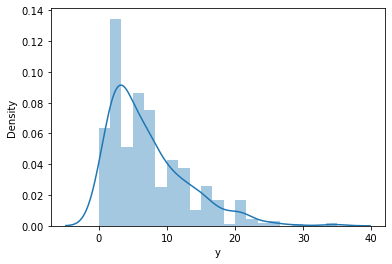

In [158]:
sns.distplot(df_forecast_qty['y'])

Terlihat dari Distribution plot bahwa data Quantity memiliki persebaran yang tidak normal.

In [159]:
#Definisi Model & Fitting
m = prophet.Prophet()
m.add_country_holidays(country_name='BR')
m.fit(df_forecast_qty)

15:41:57 - cmdstanpy - INFO - Chain [1] start processing
15:41:57 - cmdstanpy - INFO - Chain [1] done processing


In [160]:
#Evaluasi Model
df_cv = cross_validation(m,initial='545 days',period='7 days',horizon='7 days')
df_cv

  0%|          | 0/4 [00:00<?, ?it/s]

15:41:57 - cmdstanpy - INFO - Chain [1] start processing
15:41:57 - cmdstanpy - INFO - Chain [1] done processing
15:41:57 - cmdstanpy - INFO - Chain [1] start processing
15:41:58 - cmdstanpy - INFO - Chain [1] done processing
15:41:58 - cmdstanpy - INFO - Chain [1] start processing
15:41:58 - cmdstanpy - INFO - Chain [1] done processing
15:41:58 - cmdstanpy - INFO - Chain [1] start processing
15:41:58 - cmdstanpy - INFO - Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2018-08-02,14.972365,9.865234,19.965016,15.0,2018-08-01
1,2018-08-03,13.546045,8.725026,18.281800,24.0,2018-08-01
2,2018-08-04,11.900471,6.769390,16.585544,9.0,2018-08-01
3,2018-08-05,13.078368,8.551638,17.726717,20.0,2018-08-01
4,2018-08-06,14.970189,10.067459,20.028556,24.0,2018-08-01
5,2018-08-07,14.642279,9.812036,19.529634,34.0,2018-08-01
6,2018-08-08,15.311941,10.242638,20.298839,23.0,2018-08-01
7,2018-08-09,15.675491,11.169030,20.990943,15.0,2018-08-08
8,2018-08-10,14.373728,9.390943,19.635424,8.0,2018-08-08
9,2018-08-11,12.555940,7.540357,17.877717,7.0,2018-08-08


####*Cross Validation*####

In [161]:
#Hasil Evaluasi Model
df_p = performance_metrics(df_cv,rolling_window=1)

df_p

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,7 days,47.876928,6.919316,5.445585,0.541784,0.328269,0.395734,0.535714


Hasil evaluasi performa model untuk memprediksi Quantity, didapati MAPE sebesar 54.1%.

###*Modeling with Log Transform*###

Dikarenakan performa model yang kurang baik, kita akan coba melakukan Log Transform pada data Quantity sebelum data kita fitting ke Algoritma.

<AxesSubplot:xlabel='y', ylabel='Density'>

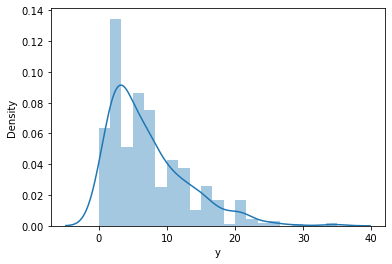

In [162]:
#Distribusi data Quantity
sns.distplot(df_forecast_qty['y'])

<AxesSubplot:xlabel='y', ylabel='Density'>

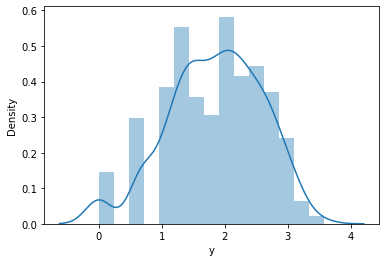

In [163]:
#Distribusi data Quantity setelah dilakukan Log Transform
df_forecast_qty_log = df_forecast_qty.copy()
df_forecast_qty_log['y'] = df_forecast_qty_log['y'].apply(lambda x:np.log(x+1))

sns.distplot(df_forecast_qty_log['y'])

Terlihat setelah dilakukan *Log Transform* persebaran data terlihat menjadi lebih mendekati normal.

In [164]:
#Definisi dan Fitting model dengan data yang telah di Log Transform
m = prophet.Prophet()
m.add_country_holidays(country_name='BR')
m.fit(df_forecast_qty_log)

15:41:59 - cmdstanpy - INFO - Chain [1] start processing
15:41:59 - cmdstanpy - INFO - Chain [1] done processing


####*Cross Validation*####


In [165]:
#Evaluasi Model
df_cv_qty = cross_validation(m,initial='545 days',period='7 days',horizon='7 days')
df_cv_qty

  0%|          | 0/4 [00:00<?, ?it/s]

15:41:59 - cmdstanpy - INFO - Chain [1] start processing
15:41:59 - cmdstanpy - INFO - Chain [1] done processing
15:41:59 - cmdstanpy - INFO - Chain [1] start processing
15:41:59 - cmdstanpy - INFO - Chain [1] done processing
15:41:59 - cmdstanpy - INFO - Chain [1] start processing
15:41:59 - cmdstanpy - INFO - Chain [1] done processing
15:41:59 - cmdstanpy - INFO - Chain [1] start processing
15:41:59 - cmdstanpy - INFO - Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2018-08-02,2.806173,2.169701,3.446263,2.772589,2018-08-01
1,2018-08-03,2.627658,1.977582,3.239274,3.218876,2018-08-01
2,2018-08-04,2.433157,1.785635,3.039699,2.302585,2018-08-01
3,2018-08-05,2.577241,1.951101,3.232562,3.044522,2018-08-01
4,2018-08-06,2.857739,2.228269,3.460924,3.218876,2018-08-01
5,2018-08-07,2.800224,2.173988,3.430604,3.555348,2018-08-01
6,2018-08-08,2.864528,2.190648,3.504467,3.178054,2018-08-01
7,2018-08-09,2.838982,2.218402,3.448563,2.772589,2018-08-08
8,2018-08-10,2.671280,2.077085,3.302151,2.197225,2018-08-08
9,2018-08-11,2.467538,1.858538,3.052802,2.079442,2018-08-08


In [166]:
df_cv_qty_trans = df_cv_qty.copy()
df_cv_qty_trans['y'] = df_cv_qty_trans['y'].apply(lambda x:np.exp(x)-1)
df_cv_qty_trans['yhat'] = df_cv_qty_trans['yhat'].apply(lambda x:np.exp(x)-1)

df_cv_qty_trans

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2018-08-02,15.546470,2.169701,3.446263,15.0,2018-08-01
1,2018-08-03,12.841318,1.977582,3.239274,24.0,2018-08-01
2,2018-08-04,10.394804,1.785635,3.039699,9.0,2018-08-01
3,2018-08-05,12.160781,1.951101,3.232562,20.0,2018-08-01
4,2018-08-06,16.422089,2.228269,3.460924,24.0,2018-08-01
5,2018-08-07,15.448331,2.173988,3.430604,34.0,2018-08-01
6,2018-08-08,16.540778,2.190648,3.504467,23.0,2018-08-01
7,2018-08-09,16.098345,2.218402,3.448563,15.0,2018-08-08
8,2018-08-10,13.458468,2.077085,3.302151,8.0,2018-08-08
9,2018-08-11,10.793377,1.858538,3.052802,7.0,2018-08-08


In [167]:
#Hasil Evaluasi Model
df_p_qty = performance_metrics(df_cv_qty_trans,rolling_window=1)

df_p_qty

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,7 days,48.019976,6.929645,5.314961,0.534861,0.282543,0.380005,0.0


Terjadi penurunan performa model saat dilakukan Log Transform terlebih dahulu terhadap data Quantity sebelum di fitting ke algoritma. Didapati MAPE pada model sebelumnya sebesar 54.1%, MAPE pada model yang di fitting dengan data yang telah di transform sebesar 54.8%.

###*Modeling With Binning (Weekly)*###

In [168]:
df_forecast_qty_weekly = df_forecast_qty.copy()
df_forecast_qty_weekly['year'] = df_forecast_qty_weekly['ds'].dt.year
df_forecast_qty_weekly['week of year'] = df_forecast_qty_weekly['ds'].dt.weekofyear
df_forecast_qty_weekly

,ds,y,year,week of year
139,2017-02-01,3.0,2017,5
140,2017-02-02,4.0,2017,5
141,2017-02-03,3.0,2017,5
142,2017-02-04,5.0,2017,5
143,2017-02-05,3.0,2017,5
...,...,...,...,...
709,2018-08-25,8.0,2018,34
710,2018-08-26,7.0,2018,34
711,2018-08-27,6.0,2018,35
712,2018-08-28,4.0,2018,35


In [169]:
df_forecast_qty_weekly = df_forecast_qty_weekly.groupby(['year','week of year']).agg({'ds':'max','y':'sum'})
df_forecast_qty_weekly

ds      y
year week of year                  
2017 5            2017-02-05   18.0
     6            2017-02-12   22.0
     7            2017-02-19    7.0
     8            2017-02-26   17.0
     9            2017-03-05    9.0
...                      ...    ...
2018 31           2018-08-05  120.0
     32           2018-08-12  124.0
     33           2018-08-19  110.0
     34           2018-08-26   73.0
     35           2018-08-29   16.0

[83 rows x 2 columns]

<AxesSubplot:xlabel='y', ylabel='Density'>

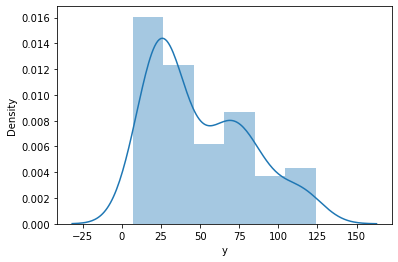

In [170]:
#Cek distribusi data Quantity setelah di Binning
sns.distplot(df_forecast_qty_weekly['y'])

In [171]:
#Definisi Model & Fitting
m = prophet.Prophet()
m.add_country_holidays(country_name='BR')
m.fit(df_forecast_qty_weekly)

15:42:00 - cmdstanpy - INFO - Chain [1] start processing
15:42:00 - cmdstanpy - INFO - Chain [1] done processing


####*Cross Validation*####

In [172]:
df_cv_qty_weekly = cross_validation(m,initial='77 W',period='1 W',horizon='4 W')
df_cv_qty_weekly

  0%|          | 0/1 [00:00<?, ?it/s]

15:42:00 - cmdstanpy - INFO - Chain [1] start processing
15:42:01 - cmdstanpy - INFO - Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2018-08-05,91.103337,73.336931,108.936237,120.0,2018-08-01
1,2018-08-12,92.218329,74.858568,109.462567,124.0,2018-08-01
2,2018-08-19,93.333321,75.683083,110.417810,110.0,2018-08-01
3,2018-08-26,94.448313,76.145452,113.089315,73.0,2018-08-01
4,2018-08-29,90.392134,72.780943,108.318676,16.0,2018-08-01


In [173]:
df_p_qty_weekly = performance_metrics(df_cv_qty_weekly[:4], rolling_window = 1)
df_p_qty_weekly

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,25 days,645.725012,25.41112,24.698331,0.235609,0.248555,0.246965,0.25


Didapati terjadi peningkatan performa dengan melakukan Binning Mingguan terhadap data Quantity, dengan MAPE menjadi 23.5% dibanding dengan Model yang datanya tidak dilakukan Feature Engineering terlebih dahulu yang memiliki MAPE 54.1%.

###*Modeling With Binning Weekly & Log Transform*###

In [174]:
df_forecast_qty_weekly_log = df_forecast_qty_weekly.copy()
df_forecast_qty_weekly_log['y'] = df_forecast_qty_weekly_log['y'].apply(lambda x:np.log(x))
df_forecast_qty_weekly_log

ds         y
year week of year                     
2017 5            2017-02-05  2.890372
     6            2017-02-12  3.091042
     7            2017-02-19  1.945910
     8            2017-02-26  2.833213
     9            2017-03-05  2.197225
...                      ...       ...
2018 31           2018-08-05  4.787492
     32           2018-08-12  4.820282
     33           2018-08-19  4.700480
     34           2018-08-26  4.290459
     35           2018-08-29  2.772589

[83 rows x 2 columns]

<AxesSubplot:xlabel='y', ylabel='Density'>

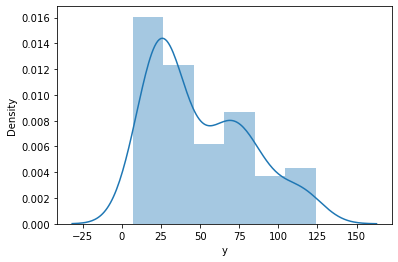

In [175]:
#Distribusi data quantity mingguan
sns.distplot(df_forecast_qty_weekly['y'])

<AxesSubplot:xlabel='y', ylabel='Density'>

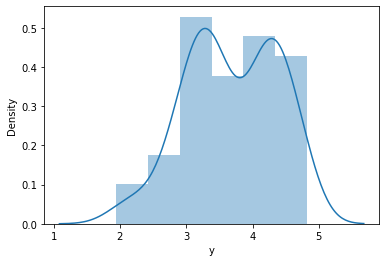

In [176]:
#Distribusi data quantity mingguan setelah dilakukan Log Transform
sns.distplot(df_forecast_qty_weekly_log['y'])

Bila 2 grafik diatas dibandingkan, Distribution Plot dari data Quantity Mingguan cenderung terkesan condong ke kanan (right skewed), setelah dilakukan Log Transform terlihat bahwa data sedikit lebih mendekati normal, namun terlihat sedikit cenderung condong ke kiri (Left Skewed).

In [177]:
#Definisi Model & Fitting Model
m = prophet.Prophet()
m.add_country_holidays(country_name='BR')
m.fit(df_forecast_qty_weekly_log)

15:42:01 - cmdstanpy - INFO - Chain [1] start processing
15:42:02 - cmdstanpy - INFO - Chain [1] done processing


####*Cross Validation*####

In [178]:
df_cv_qty_weekly_log = cross_validation(m,initial='77 W',period='1 W',horizon='4 W')
df_cv_qty_weekly_log

  0%|          | 0/1 [00:00<?, ?it/s]

15:42:02 - cmdstanpy - INFO - Chain [1] start processing
15:42:02 - cmdstanpy - INFO - Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2018-08-05,4.694853,4.306728,5.076809,4.787492,2018-08-01
1,2018-08-12,4.721215,4.356642,5.084736,4.820282,2018-08-01
2,2018-08-19,4.747577,4.377087,5.110711,4.700480,2018-08-01
3,2018-08-26,4.773938,4.438565,5.167365,4.290459,2018-08-01
4,2018-08-29,1.943774,1.571154,2.335446,2.772589,2018-08-01


In [179]:
df_cv_qty_weekly_log_trans = df_cv_qty_weekly_log.copy()
df_cv_qty_weekly_log_trans['y'] = df_cv_qty_weekly_log_trans['y'].apply(lambda x:np.exp(x)) 
df_cv_qty_weekly_log_trans['yhat'] = df_cv_qty_weekly_log_trans['yhat'].apply(lambda x:np.exp(x))
df_cv_qty_weekly_log_trans

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2018-08-05,109.382700,4.306728,5.076809,120.0,2018-08-01
1,2018-08-12,112.304580,4.356642,5.084736,124.0,2018-08-01
2,2018-08-19,115.304510,4.377087,5.110711,110.0,2018-08-01
3,2018-08-26,118.384576,4.438565,5.167365,73.0,2018-08-01
4,2018-08-29,6.985063,1.571154,2.335446,16.0,2018-08-01


In [180]:
df_p_qty_weekly_log = performance_metrics(df_cv_qty_weekly_log_trans[:4],rolling_window=1)
df_p_qty_weekly_log

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,25 days,584.351869,24.173371,18.250452,0.213181,0.091398,0.178231,0.0


Model mengalami peningkatan performa jika dibandingkan dengan model yang hanya dilakukan Binning saja, model yang dilakukan Binning & Log Transform memiliki MAPE 21.3%, sedangkan model yang hanya dilakukan Binning saja memiliki MAPE 23.5%.

##**Forecast for Volume**##

###*Base Model (No Feature Engineering)*###

In [181]:
df_forecast_volume.rename(columns={'product_volume':'y'},inplace=True)
df_forecast_volume

,ds,y
139,2017-02-01,10122.0
140,2017-02-02,36557.0
141,2017-02-03,37800.0
142,2017-02-04,66124.0
143,2017-02-05,10724.0
...,...,...
709,2018-08-25,98214.0
710,2018-08-26,38469.0
711,2018-08-27,34120.0
712,2018-08-28,16136.0


<AxesSubplot:xlabel='y', ylabel='Density'>

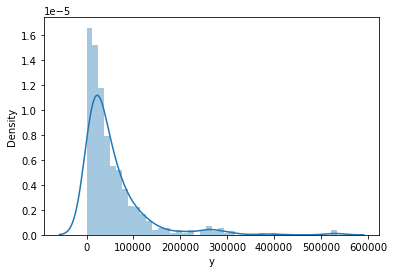

In [182]:
sns.distplot(df_forecast_volume['y'])

Dari Distribution plot diatas, terlihat bahwa persebaran data Volume condong ke kanan (right skewed).

In [183]:
m = prophet.Prophet()
m.add_country_holidays(country_name='BR')
m.fit(df_forecast_volume)

15:42:02 - cmdstanpy - INFO - Chain [1] start processing
15:42:02 - cmdstanpy - INFO - Chain [1] done processing


####*Cross Validation*####

In [184]:
#Evaluasi Model
df_cv_v = cross_validation(m,initial='545 days',period='7 days',horizon='7 days')
df_cv_v

  0%|          | 0/4 [00:00<?, ?it/s]

15:42:02 - cmdstanpy - INFO - Chain [1] start processing
15:42:02 - cmdstanpy - INFO - Chain [1] done processing
15:42:03 - cmdstanpy - INFO - Chain [1] start processing
15:42:03 - cmdstanpy - INFO - Chain [1] done processing
15:42:03 - cmdstanpy - INFO - Chain [1] start processing
15:42:03 - cmdstanpy - INFO - Chain [1] done processing
15:42:03 - cmdstanpy - INFO - Chain [1] start processing
15:42:03 - cmdstanpy - INFO - Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2018-08-02,82953.042081,-681.400953,168054.317739,85600.0,2018-08-01
1,2018-08-03,94842.082420,15190.977867,171886.602750,125658.0,2018-08-01
2,2018-08-04,84913.759874,3101.207237,170679.820222,250897.0,2018-08-01
3,2018-08-05,81055.803840,1292.295674,165802.438641,281932.0,2018-08-01
4,2018-08-06,95456.049879,19387.219788,185805.668618,123737.0,2018-08-01
5,2018-08-07,92777.732517,8533.661895,168580.145021,139053.0,2018-08-01
6,2018-08-08,86499.161958,9102.703346,171554.050070,143896.0,2018-08-01
7,2018-08-09,86021.458979,-6666.817100,170193.688946,96455.0,2018-08-08
8,2018-08-10,98331.233927,10973.465392,186971.989172,35661.0,2018-08-08
9,2018-08-11,90359.982083,12789.038401,166739.278848,36933.0,2018-08-08


In [185]:
#Hasil Evaluasi Model
df_p_v = performance_metrics(df_cv_v,rolling_window=1)

df_p_v

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,7 days,4.982566e+09,70587.296144,54078.91472,1.089313,0.491035,0.593305,0.857143


Hasil evaluasi dari model prediksi Volume didapati MAPE 109%.

###*Modeling with Log Transform*###

<AxesSubplot:xlabel='y', ylabel='Density'>

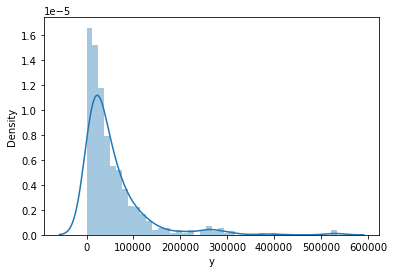

In [186]:
#Distribusi data sebelum di Log Transform
sns.distplot(df_forecast_volume['y'])

<AxesSubplot:xlabel='y', ylabel='Density'>

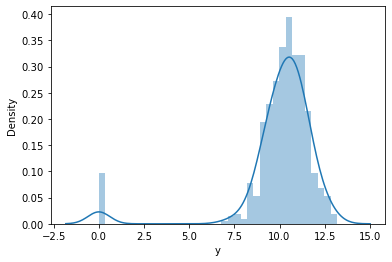

In [187]:
#Distribusi data setelah di Log Transform
df_forecast_volume_log = df_forecast_volume.copy()
df_forecast_volume_log['y'] = (df_forecast_volume['y']).apply(lambda x:np.log(x+1))

sns.distplot(df_forecast_volume_log['y'])

In [188]:
df_forecast_volume_log

,ds,y
139,2017-02-01,9.222565
140,2017-02-02,10.506655
141,2017-02-03,10.540091
142,2017-02-04,11.099302
143,2017-02-05,9.280333
...,...,...
709,2018-08-25,11.494914
710,2018-08-26,10.557634
711,2018-08-27,10.437668
712,2018-08-28,9.688870


In [189]:
m = prophet.Prophet()
m.add_country_holidays(country_name='BR')
m.fit(df_forecast_volume_log)

15:42:04 - cmdstanpy - INFO - Chain [1] start processing
15:42:04 - cmdstanpy - INFO - Chain [1] done processing


####*Cross Validation*####

In [190]:
#Evaluasi Model
df_cv_vol = cross_validation(m,initial='545 days',period='7 days',horizon='7 days')
df_cv_vol

  0%|          | 0/4 [00:00<?, ?it/s]

15:42:04 - cmdstanpy - INFO - Chain [1] start processing
15:42:04 - cmdstanpy - INFO - Chain [1] done processing
15:42:04 - cmdstanpy - INFO - Chain [1] start processing
15:42:04 - cmdstanpy - INFO - Chain [1] done processing
15:42:04 - cmdstanpy - INFO - Chain [1] start processing
15:42:05 - cmdstanpy - INFO - Chain [1] done processing
15:42:05 - cmdstanpy - INFO - Chain [1] start processing
15:42:05 - cmdstanpy - INFO - Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2018-08-02,11.085418,8.706486,13.593646,11.357452,2018-08-01
1,2018-08-03,11.238823,8.739434,13.566673,11.741327,2018-08-01
2,2018-08-04,10.943120,8.593636,13.345457,12.432802,2018-08-01
3,2018-08-05,11.253219,9.045592,13.750748,12.549425,2018-08-01
4,2018-08-06,11.758082,9.326717,14.233690,11.725922,2018-08-01
5,2018-08-07,11.436417,9.077007,13.940160,11.842618,2018-08-01
6,2018-08-08,11.584555,9.198368,14.016075,11.876853,2018-08-01
7,2018-08-09,11.182130,9.027259,13.559870,11.476842,2018-08-08
8,2018-08-10,11.338737,8.994718,13.933146,10.481841,2018-08-08
9,2018-08-11,11.055173,8.707523,13.470952,10.516888,2018-08-08


In [191]:
df_cv_vol_trans = df_cv_vol.copy()
df_cv_vol_trans['y'] = df_cv_vol_trans['y'].apply(lambda x:np.exp(x)-1)
df_cv_vol_trans['yhat'] = df_cv_vol_trans['yhat'].apply(lambda x:np.exp(x)-1)

df_cv_vol_trans

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2018-08-02,65212.267112,8.706486,13.593646,85600.0,2018-08-01
1,2018-08-03,76024.402785,8.739434,13.566673,125658.0,2018-08-01
2,2018-08-04,56562.523322,8.593636,13.345457,250897.0,2018-08-01
3,2018-08-05,77126.776878,9.045592,13.750748,281932.0,2018-08-01
4,2018-08-06,127781.193394,9.326717,14.233690,123737.0,2018-08-01
5,2018-08-07,92633.530853,9.077007,13.940160,139053.0,2018-08-01
6,2018-08-08,107424.739933,9.198368,14.016075,143896.0,2018-08-01
7,2018-08-09,71834.209467,9.027259,13.559870,96455.0,2018-08-08
8,2018-08-10,84012.873577,8.994718,13.933146,35661.0,2018-08-08
9,2018-08-11,63269.395695,8.707523,13.470952,36933.0,2018-08-08


In [192]:
df_p_v = performance_metrics(df_cv_vol_trans,rolling_window=1)

df_p_v

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,7 days,6.055519e+09,77817.217601,59904.037558,1.241316,0.549006,0.634165,0.0


Setelah dilakukan Log Transform pada data Volume, didapati penurunan performa model dengan MAPE pada model menjadi 124%.

###*Modeling With Binning*###

In [193]:
#Binning Data menjadi data Mingguan
df_forecast_volume_weekly = df_forecast_volume.copy()
df_forecast_volume_weekly['year'] = df_forecast_volume_weekly['ds'].dt.year
df_forecast_volume_weekly['week of year'] = df_forecast_volume_weekly['ds'].dt.weekofyear
df_forecast_volume_weekly = df_forecast_volume_weekly.groupby(['year','week of year']).agg({'ds':'max','y':'sum'})
df_forecast_volume_weekly

ds          y
year week of year                      
2017 5            2017-02-05   161327.0
     6            2017-02-12   177381.0
     7            2017-02-19    28364.0
     8            2017-02-26    89978.0
     9            2017-03-05    52976.0
...                      ...        ...
2018 31           2018-08-05  1063441.0
     32           2018-08-12   741434.0
     33           2018-08-19   719398.0
     34           2018-08-26   400047.0
     35           2018-08-29    60937.0

[83 rows x 2 columns]

<AxesSubplot:xlabel='y', ylabel='Density'>

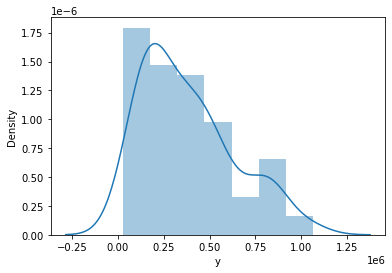

In [194]:
sns.distplot(df_forecast_volume_weekly['y'])

Setelah data dilakukan Binning, distribusi data lebih mendekati normal.

In [195]:
#Definisi Model
m = prophet.Prophet()
m.add_country_holidays(country_name='BR')
m.fit(df_forecast_volume_weekly)

15:42:05 - cmdstanpy - INFO - Chain [1] start processing
15:42:05 - cmdstanpy - INFO - Chain [1] done processing


####*Cross Validation*####

In [196]:
#Evaluasi Model
df_cv_vol_weekly = cross_validation(m,initial='77 W',period='1 W',horizon='1 W')
df_cv_vol_weekly

  0%|          | 0/4 [00:00<?, ?it/s]

15:42:05 - cmdstanpy - INFO - Chain [1] start processing
15:42:06 - cmdstanpy - INFO - Chain [1] done processing
15:42:06 - cmdstanpy - INFO - Chain [1] start processing
15:42:06 - cmdstanpy - INFO - Chain [1] done processing
15:42:06 - cmdstanpy - INFO - Chain [1] start processing
15:42:06 - cmdstanpy - INFO - Chain [1] done processing
15:42:07 - cmdstanpy - INFO - Chain [1] start processing
15:42:07 - cmdstanpy - INFO - Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2018-08-05,613776.369500,342993.347761,858109.117602,1063441.0,2018-08-01
1,2018-08-12,643028.652308,379344.348563,900134.114757,741434.0,2018-08-08
2,2018-08-19,653362.151058,405330.261968,899635.830091,719398.0,2018-08-15
3,2018-08-26,664948.277376,419601.678699,932897.703118,400047.0,2018-08-22
4,2018-08-29,543459.836144,307162.936639,777811.209799,60937.0,2018-08-22


In [197]:
#Hasil Evaluasi Model
df_p_v_weekly = performance_metrics(df_cv_vol_weekly[:4],rolling_window=1)

df_p_v_weekly

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,4 days,7.160383e+10,267588.916287,219751.776128,0.327383,0.277781,0.31801,0.5


Setelah model dilakukan Binning, model mengalami peningkatan performa dengan MAPE 32.7%.

###*Modeling With Binning & Log Transform*###

In [198]:
df_forecast_volume_weekly_log = df_forecast_volume_weekly.copy()

df_forecast_volume_weekly_log['y'] = df_forecast_volume_weekly_log['y'].apply(lambda x:np.log(x))

df_forecast_volume_weekly_log

ds          y
year week of year                      
2017 5            2017-02-05  11.991189
     6            2017-02-12  12.086055
     7            2017-02-19  10.252876
     8            2017-02-26  11.407320
     9            2017-03-05  10.877594
...                      ...        ...
2018 31           2018-08-05  13.877020
     32           2018-08-12  13.516341
     33           2018-08-19  13.486170
     34           2018-08-26  12.899337
     35           2018-08-29  11.017596

[83 rows x 2 columns]

<AxesSubplot:xlabel='y', ylabel='Density'>

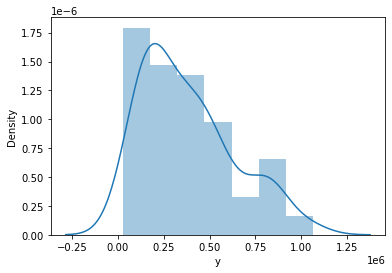

In [199]:
#Distribusi Data Volume mingguan
sns.distplot(df_forecast_volume_weekly['y'])

<AxesSubplot:xlabel='y', ylabel='Density'>

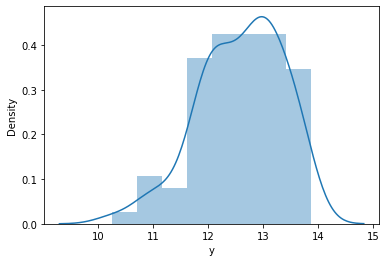

In [200]:
#Distribusi Data Volume mingguan setelah dilakukan Log Transform
sns.distplot(df_forecast_volume_weekly_log['y'])

Dari visualisasi Distribution Plot, dapat dilihat bahwa Log Transform pada data yang telah di binning menghasilkan distribusi data yang lebih mendekati normal.

In [201]:
#Definisi Model
m = prophet.Prophet()
m.add_country_holidays(country_name='BR')
m.fit(df_forecast_volume_weekly_log)

15:42:07 - cmdstanpy - INFO - Chain [1] start processing
15:42:08 - cmdstanpy - INFO - Chain [1] done processing


####*Cross Validation*####

In [202]:
#Evaluasi Model
df_cv_vol_weekly_log = cross_validation(m,initial='77 W',period='1 W',horizon='1 W')
df_cv_vol_weekly_log

  0%|          | 0/4 [00:00<?, ?it/s]

15:42:08 - cmdstanpy - INFO - Chain [1] start processing
15:42:08 - cmdstanpy - INFO - Chain [1] done processing
15:42:08 - cmdstanpy - INFO - Chain [1] start processing
15:42:09 - cmdstanpy - INFO - Chain [1] done processing
15:42:09 - cmdstanpy - INFO - Chain [1] start processing
15:42:09 - cmdstanpy - INFO - Chain [1] done processing
15:42:09 - cmdstanpy - INFO - Chain [1] start processing
15:42:10 - cmdstanpy - INFO - Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2018-08-05,13.438907,12.781186,14.191852,13.877020,2018-08-01
1,2018-08-12,13.484024,12.823567,14.176925,13.516341,2018-08-08
2,2018-08-19,13.507156,12.778444,14.198529,13.486170,2018-08-15
3,2018-08-26,13.527905,12.833087,14.227534,12.899337,2018-08-22
4,2018-08-29,0.887186,0.213157,1.600115,11.017596,2018-08-22


In [203]:
df_cv_vol_weekly_log_trans = df_cv_vol_weekly_log.copy()
df_cv_vol_weekly_log_trans['y'] = df_cv_vol_weekly_log_trans['y'].apply(lambda x:np.exp(x))
df_cv_vol_weekly_log_trans['yhat'] = df_cv_vol_weekly_log_trans['yhat'].apply(lambda x:np.exp(x)) 
df_cv_vol_weekly_log_trans

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2018-08-05,686187.763109,12.781186,14.191852,1063441.0,2018-08-01
1,2018-08-12,717855.607406,12.823567,14.176925,741434.0,2018-08-08
2,2018-08-19,734654.806424,12.778444,14.198529,719398.0,2018-08-15
3,2018-08-26,750057.119893,12.833087,14.227534,400047.0,2018-08-22
4,2018-08-29,2.428286,0.213157,1.600115,60937.0,2018-08-22


In [204]:
#Hasil Evaluasi Model
df_p_v_weekly_log = performance_metrics(df_cv_vol_weekly_log_trans[:4],rolling_window=1)

df_p_v_weekly_log

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,4 days,6.640395e+10,257689.63867,191524.638951,0.32067,0.193274,0.273299,0.0


Model dengan Binning & Log Transform memiliki performa lebih baik dengan MAPE 32%.

##**Hyperparameter Tuning**##

###*Model Prediksi Sales*###

In [205]:
import itertools

param_grid = {  
    'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
    'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0],
}

#Menggabungkan kombinasi parameter
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
mapes = []  

for params in all_params:
    m = prophet.Prophet(**params).fit(df_forecast_price_monthly)  # Fit model with given params
    df_cv = cross_validation(m,initial='458 days',period='29 days',horizon='1 days', parallel="processes") 
    df_p = performance_metrics(df_cv, rolling_window=1)
    mapes.append(np.average(df_p['mape']))


15:42:10 - cmdstanpy - INFO - Chain [1] start processing
15:42:10 - cmdstanpy - INFO - Chain [1] done processing
15:42:12 - cmdstanpy - INFO - Chain [1] start processing
15:42:12 - cmdstanpy - INFO - Chain [1] start processing
15:42:12 - cmdstanpy - INFO - Chain [1] start processing
15:42:13 - cmdstanpy - INFO - Chain [1] done processing
15:42:13 - cmdstanpy - INFO - Chain [1] done processing
15:42:14 - cmdstanpy - INFO - Chain [1] done processing
15:42:14 - cmdstanpy - INFO - Chain [1] start processing
15:42:14 - cmdstanpy - INFO - Chain [1] done processing
15:42:16 - cmdstanpy - INFO - Chain [1] start processing
15:42:16 - cmdstanpy - INFO - Chain [1] start processing
15:42:16 - cmdstanpy - INFO - Chain [1] start processing
15:42:16 - cmdstanpy - INFO - Chain [1] done processing
15:42:17 - cmdstanpy - INFO - Chain [1] done processing
15:42:17 - cmdstanpy - INFO - Chain [1] done processing
15:42:17 - cmdstanpy - INFO - Chain [1] start processing
15:42:18 - cmdstanpy - INFO - Chain [1]

In [206]:
tuning_results = pd.DataFrame(all_params)
tuning_results['mape'] = mapes
print(tuning_results.sort_values('mape',ascending=True))

    changepoint_prior_scale  seasonality_prior_scale      mape
4                     0.010                     0.01  0.115888
5                     0.010                     0.10  0.115888
6                     0.010                     1.00  0.115888
7                     0.010                    10.00  0.115888
8                     0.100                     0.01  0.117087
9                     0.100                     0.10  0.117087
10                    0.100                     1.00  0.117087
11                    0.100                    10.00  0.117087
0                     0.001                     0.01  0.130059
1                     0.001                     0.10  0.130059
2                     0.001                     1.00  0.130059
3                     0.001                    10.00  0.130059
12                    0.500                     0.01  0.146154
13                    0.500                     0.10  0.146154
14                    0.500                     1.00  0

Setelah dilakukan Hyperparameter Tuning didapati MAPE terbaik adalah 11.5%, lebih baik dibanding base model yang memiliki MAPE 12.4%.

###*Model Prediksi Quantity*###

In [207]:
param_grid = {  
    'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
    'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0],
}

#Menggabungkan kombinasi parameter
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
mapes = []  

for params in all_params:
    m = prophet.Prophet(**params).fit(df_forecast_qty_weekly_log)  # Fit model with given params
    df_cv = cross_validation(m, initial='77 W',period='1 W',horizon='4 W', parallel="processes")
    df_cv_trans = df_cv.copy()
    df_cv_trans['y'] = df_cv_trans['y'].apply(lambda x:np.exp(x))
    df_cv_trans['yhat'] = df_cv_trans['yhat'].apply(lambda x:np.exp(x)) 
    df_p = performance_metrics(df_cv_trans[:4], rolling_window=1)
    mapes.append(np.average(df_p['mape']))

15:42:56 - cmdstanpy - INFO - Chain [1] start processing
15:42:56 - cmdstanpy - INFO - Chain [1] done processing
15:42:58 - cmdstanpy - INFO - Chain [1] start processing
15:42:58 - cmdstanpy - INFO - Chain [1] done processing
15:42:58 - cmdstanpy - INFO - Chain [1] start processing
15:42:59 - cmdstanpy - INFO - Chain [1] done processing
15:43:00 - cmdstanpy - INFO - Chain [1] start processing
15:43:01 - cmdstanpy - INFO - Chain [1] done processing
15:43:01 - cmdstanpy - INFO - Chain [1] start processing
15:43:01 - cmdstanpy - INFO - Chain [1] done processing
15:43:03 - cmdstanpy - INFO - Chain [1] start processing
15:43:03 - cmdstanpy - INFO - Chain [1] done processing
15:43:03 - cmdstanpy - INFO - Chain [1] start processing
15:43:04 - cmdstanpy - INFO - Chain [1] done processing
15:43:05 - cmdstanpy - INFO - Chain [1] start processing
15:43:05 - cmdstanpy - INFO - Chain [1] done processing
15:43:06 - cmdstanpy - INFO - Chain [1] start processing
15:43:06 - cmdstanpy - INFO - Chain [1]

In [208]:
tuning_results = pd.DataFrame(all_params)
tuning_results['mape'] = mapes
print(tuning_results.sort_values('mape',ascending=True))

    changepoint_prior_scale  seasonality_prior_scale      mape
0                     0.001                     0.01  0.211405
10                    0.100                     1.00  0.211616
11                    0.100                    10.00  0.211643
8                     0.100                     0.01  0.211656
9                     0.100                     0.10  0.211785
4                     0.010                     0.01  0.211874
7                     0.010                    10.00  0.212362
6                     0.010                     1.00  0.212365
5                     0.010                     0.10  0.212367
3                     0.001                    10.00  0.212369
2                     0.001                     1.00  0.212373
1                     0.001                     0.10  0.212379
14                    0.500                     1.00  0.234101
13                    0.500                     0.10  0.234234
15                    0.500                    10.00  0

Hasil dari hyparameter tuning menunjukkan sedikit peningkatan performa dari base model, dimana Base model menghasilkan MAPE 21.3% dan hasil terbaik dari Hyperparameter Tuning adalah 21.1%.

###*Model Prediksi Volume*###

In [209]:
import itertools

param_grid = {  
    'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
    'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0],
}

#Menggabungkan kombinasi parameter
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
mapes = []  

for params in all_params:
    m = prophet.Prophet(**params).fit(df_forecast_volume_weekly_log)  # Fit model with given params
    df_cv = cross_validation(m, initial='77 W',period='1 W',horizon='1 W', parallel="processes")
    df_cv_trans = df_cv.copy()
    df_cv_trans['y'] = df_cv_trans['y'].apply(lambda x:np.exp(x))
    df_cv_trans['yhat'] = df_cv_trans['yhat'].apply(lambda x:np.exp(x)) 
    df_p = performance_metrics(df_cv_trans[:4], rolling_window=1)
    mapes.append(np.average(df_p['mape']))

15:43:36 - cmdstanpy - INFO - Chain [1] start processing
15:43:37 - cmdstanpy - INFO - Chain [1] done processing
15:43:39 - cmdstanpy - INFO - Chain [1] start processing
15:43:39 - cmdstanpy - INFO - Chain [1] start processing
15:43:39 - cmdstanpy - INFO - Chain [1] start processing
15:43:39 - cmdstanpy - INFO - Chain [1] start processing
15:43:39 - cmdstanpy - INFO - Chain [1] done processing
15:43:39 - cmdstanpy - INFO - Chain [1] done processing
15:43:39 - cmdstanpy - INFO - Chain [1] done processing
15:43:40 - cmdstanpy - INFO - Chain [1] done processing
15:43:40 - cmdstanpy - INFO - Chain [1] start processing
15:43:41 - cmdstanpy - INFO - Chain [1] done processing
15:43:44 - cmdstanpy - INFO - Chain [1] start processing
15:43:44 - cmdstanpy - INFO - Chain [1] start processing
15:43:44 - cmdstanpy - INFO - Chain [1] start processing
15:43:44 - cmdstanpy - INFO - Chain [1] start processing
15:43:44 - cmdstanpy - INFO - Chain [1] done processing
15:43:44 - cmdstanpy - INFO - Chain [1

15:44:44 - cmdstanpy - INFO - Chain [1] done processing
15:44:44 - cmdstanpy - INFO - Chain [1] done processing
15:44:44 - cmdstanpy - INFO - Chain [1] done processing
15:44:44 - cmdstanpy - INFO - Chain [1] done processing
15:44:45 - cmdstanpy - INFO - Chain [1] start processing
15:44:45 - cmdstanpy - INFO - Chain [1] done processing
15:44:48 - cmdstanpy - INFO - Chain [1] start processing
15:44:48 - cmdstanpy - INFO - Chain [1] start processing
15:44:48 - cmdstanpy - INFO - Chain [1] start processing
15:44:48 - cmdstanpy - INFO - Chain [1] start processing
15:44:49 - cmdstanpy - INFO - Chain [1] done processing
15:44:49 - cmdstanpy - INFO - Chain [1] done processing
15:44:49 - cmdstanpy - INFO - Chain [1] done processing
15:44:49 - cmdstanpy - INFO - Chain [1] done processing


In [210]:
tuning_results = pd.DataFrame(all_params)
tuning_results['mape'] = mapes
print(tuning_results.sort_values('mape',ascending=True))

    changepoint_prior_scale  seasonality_prior_scale      mape
4                     0.010                     0.01  0.317202
5                     0.010                     0.10  0.318972
6                     0.010                     1.00  0.322660
7                     0.010                    10.00  0.322865
0                     0.001                     0.01  0.325396
11                    0.100                    10.00  0.328593
2                     0.001                     1.00  0.330966
1                     0.001                     0.10  0.331112
3                     0.001                    10.00  0.331285
10                    0.100                     1.00  0.333247
8                     0.100                     0.01  0.334481
9                     0.100                     0.10  0.335616
15                    0.500                    10.00  0.382533
14                    0.500                     1.00  0.382810
12                    0.500                     0.01  0

Setelah dilakukan Hyperparameter Tuning pada model prediksi volume, didapati sedikit peningkatan performa model dari base model dengan MAPE 32% menjadi MAPE 31.7%.

##**Forecasting With Best Model**##

###*Forecast Expected Revenue*###

In [211]:
m = prophet.Prophet(changepoint_prior_scale=0.01, seasonality_prior_scale=0.01)
m.add_country_holidays(country_name='BR')
m.fit(df_forecast_price_monthly)

15:44:49 - cmdstanpy - INFO - Chain [1] start processing
15:44:49 - cmdstanpy - INFO - Chain [1] done processing


In [212]:
#Forecast 3 bulan ke depan
df_future = m.make_future_dataframe(periods=4,freq='M')
df_predict = m.predict(df_future)
df_predict.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Ano novo,Ano novo_lower,Ano novo_upper,Carnaval,...,additive_terms,additive_terms_lower,additive_terms_upper,holidays,holidays_lower,holidays_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
18,2018-08-29,44279.485793,38917.115712,49484.046475,44279.485793,44279.485793,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,44279.485793
19,2018-08-31,44434.520559,39088.075137,50040.294743,44434.520539,44434.520577,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,44434.520559
20,2018-09-30,46760.042042,41320.988141,52378.313593,46760.041980,46760.042101,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46760.042042
21,2018-10-31,49163.080908,43829.703757,54469.506356,49163.080794,49163.081028,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49163.080908
22,2018-11-30,51488.602391,46080.482897,56870.895793,51488.602214,51488.602587,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,51488.602391


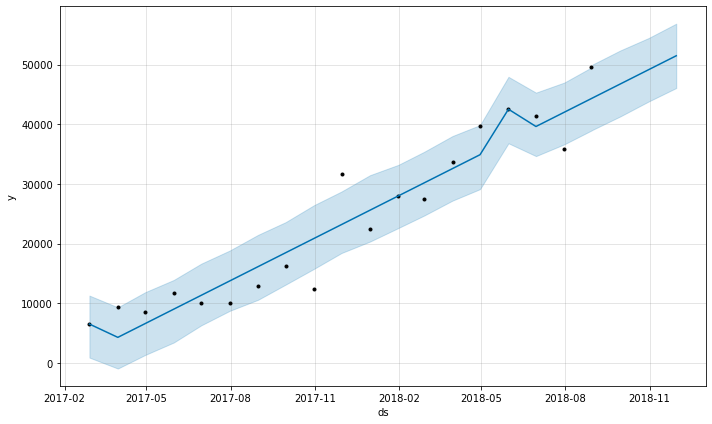

In [213]:
fig1 = m.plot(df_predict)

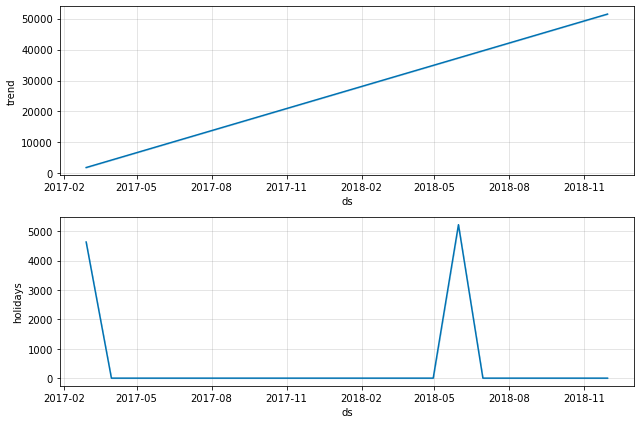

In [214]:
fig2 = m.plot_components(df_predict)

In [215]:
#Buat Dataframe hasil prediksi
df_forecast_result = df_predict[['ds','yhat','yhat_lower','yhat_upper']]

In [216]:
df_forecast_result.tail(3)

,ds,yhat,yhat_lower,yhat_upper
20,2018-09-30,46760.042042,41320.988141,52378.313593
21,2018-10-31,49163.080908,43829.703757,54469.506356
22,2018-11-30,51488.602391,46080.482897,56870.895793


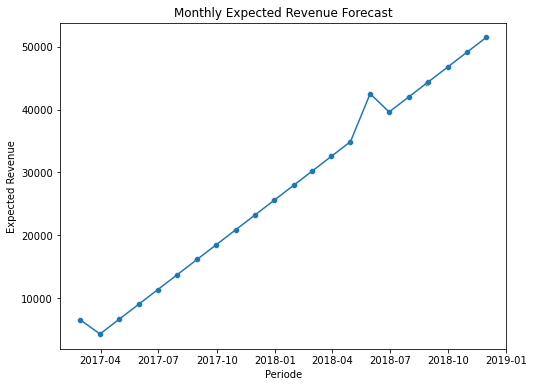

In [217]:
plt.figure(figsize=(8,6))
sns.lineplot(data = df_forecast_result, x = 'ds', y = 'yhat')
sns.scatterplot(data = df_forecast_result, x = 'ds', y = 'yhat')
plt.xlabel('Periode')
plt.ylabel('Expected Revenue')
plt.title('Monthly Expected Revenue Forecast')
plt.show()

###*Forecast Sales Quantity*###

In [218]:
#Definisi dan Fitting model dengan Best Parameter
m = prophet.Prophet(changepoint_prior_scale=0.001,seasonality_prior_scale=0.01)
m.add_country_holidays(country_name='BR')
m.fit(df_forecast_qty_weekly_log)

15:44:50 - cmdstanpy - INFO - Chain [1] start processing
15:44:51 - cmdstanpy - INFO - Chain [1] done processing


In [219]:
#Forecast 5 Minggu ke depan
df_future_qty = m.make_future_dataframe(periods=5,freq='W')
df_predict_qty = m.predict(df_future_qty)
df_predict_qty.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Ano novo,Ano novo_lower,Ano novo_upper,Carnaval,...,holidays,holidays_lower,holidays_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
83,2018-09-02,4.546017,4.175274,5.090808,4.546017,4.546017,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.100745,0.100745,0.100745,0.0,0.0,0.0,4.646762
84,2018-09-09,4.569559,4.198536,5.129161,4.569559,4.569559,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.100745,0.100745,0.100745,0.0,0.0,0.0,4.670304
85,2018-09-16,4.593101,4.257453,5.126977,4.593101,4.593101,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.100745,0.100745,0.100745,0.0,0.0,0.0,4.693846
86,2018-09-23,4.616643,4.253260,5.192689,4.616643,4.616643,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.100745,0.100745,0.100745,0.0,0.0,0.0,4.717389
87,2018-09-30,4.640186,4.333764,5.237622,4.640186,4.640186,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.100745,0.100745,0.100745,0.0,0.0,0.0,4.740931


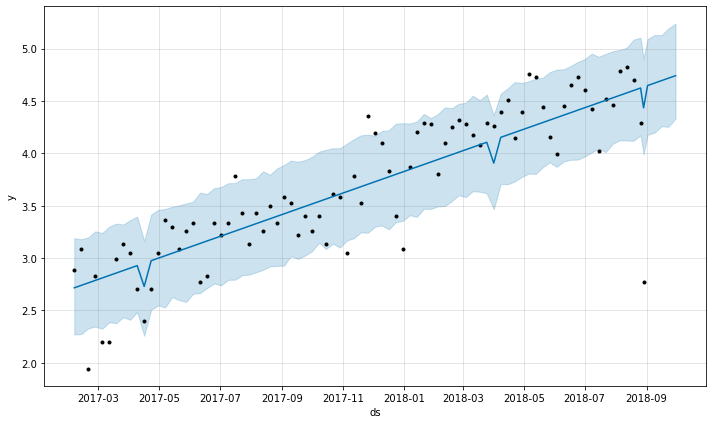

In [220]:
fig_qty1 = m.plot(df_predict_qty)

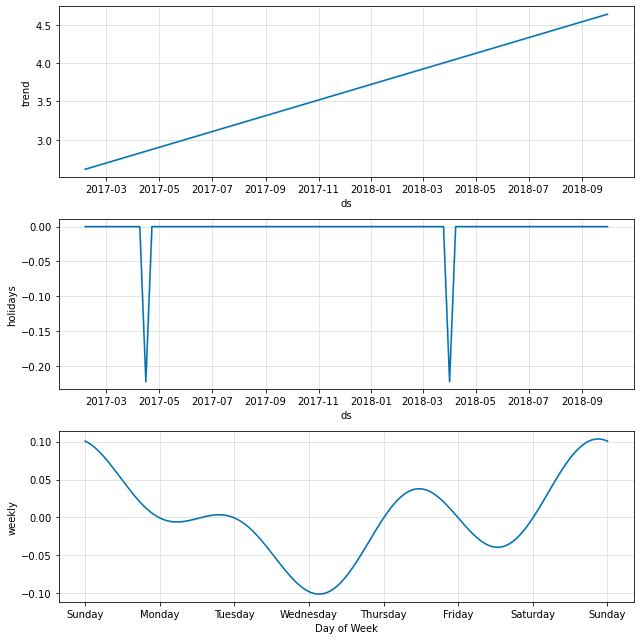

In [221]:
fig_qty2 = m.plot_components(df_predict_qty)

In [222]:
#Buat Dataframe hasil Forecast
df_forecast_result_qty = df_predict_qty[['ds','yhat']]

In [223]:
#Hasil Forecast dikembalikan dari bentuk Log dengan dilakukan fungsi Exp
df_forecast_result_qty['yhat'] = df_forecast_result_qty['yhat'].apply(lambda x:np.exp(x)) 

In [224]:
df_forecast_result_qty.tail(5)

,ds,yhat
83,2018-09-02,104.246865
84,2018-09-09,106.730194
85,2018-09-16,109.272679
86,2018-09-23,111.875731
87,2018-09-30,114.540791


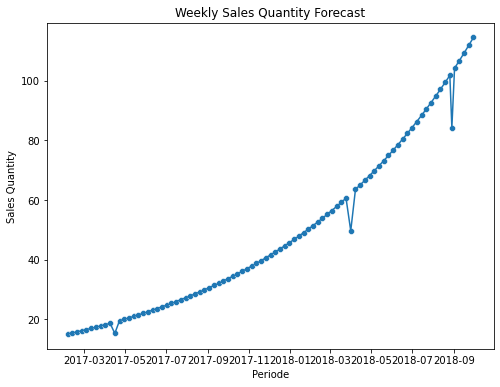

In [225]:
plt.figure(figsize=(8,6))
sns.lineplot(data = df_forecast_result_qty, x = 'ds', y = 'yhat')
sns.scatterplot(data = df_forecast_result_qty, x = 'ds', y = 'yhat')
plt.xlabel('Periode')
plt.ylabel('Sales Quantity')
plt.title('Weekly Sales Quantity Forecast')
plt.show()

In [226]:
#Pembuatan Dataframe untuk mengaggregat data menjadi bulanan
df_forecast_result_qty_monthly = df_forecast_result_qty.copy()
df_forecast_result_qty_monthly['period'] = pd.to_datetime(df_forecast_result_qty_monthly['ds']).dt.to_period('M')
df_forecast_result_qty_monthly

,ds,yhat,period
0,2017-02-05,15.124149,2017-02
1,2017-02-12,15.484430,2017-02
2,2017-02-19,15.853294,2017-02
3,2017-02-26,16.230945,2017-02
4,2017-03-05,16.617593,2017-03
...,...,...,...
83,2018-09-02,104.246865,2018-09
84,2018-09-09,106.730194,2018-09
85,2018-09-16,109.272679,2018-09
86,2018-09-23,111.875731,2018-09


In [227]:
df_forecast_result_qty_monthly = df_forecast_result_qty_monthly.groupby('period').agg({'ds':'max','yhat':'sum'}).reset_index()
df_forecast_result_qty_monthly

,period,ds,yhat
0,2017-02,2017-02-26,62.692818
1,2017-03,2017-03-26,68.883462
2,2017-04,2017-04-30,91.929913
3,2017-05,2017-05-28,85.139993
4,2017-06,2017-06-25,93.547198
5,2017-07,2017-07-30,130.029043
6,2017-08,2017-08-27,115.624382
7,2017-09,2017-09-24,127.041789
8,2017-10,2017-10-29,176.585964
9,2017-11,2017-11-26,157.023713


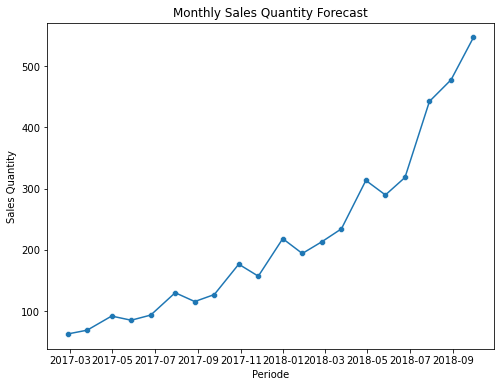

In [228]:
plt.figure(figsize=(8,6))
sns.lineplot(data = df_forecast_result_qty_monthly, x = 'ds', y = 'yhat')
sns.scatterplot(data = df_forecast_result_qty_monthly, x = 'ds', y = 'yhat')
plt.xlabel('Periode')
plt.ylabel('Sales Quantity')
plt.title('Monthly Sales Quantity Forecast')
plt.show()

###*Forecast Volume*###

In [229]:
m = prophet.Prophet(changepoint_prior_scale=0.01, seasonality_prior_scale=0.01)
m.add_country_holidays(country_name='BR')
m.fit(df_forecast_volume_weekly_log)

15:44:52 - cmdstanpy - INFO - Chain [1] start processing
15:44:52 - cmdstanpy - INFO - Chain [1] done processing


In [230]:
#Forecast 5 Minggu
df_future_vol = m.make_future_dataframe(periods=5,freq='W')
df_predict_vol = m.predict(df_future_vol)
df_predict_vol.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Ano novo,Ano novo_lower,Ano novo_upper,Carnaval,...,holidays,holidays_lower,holidays_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
83,2018-09-02,13.094531,12.721281,14.163260,13.094531,13.094531,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.339672,0.339672,0.339672,0.0,0.0,0.0,13.434203
84,2018-09-09,13.114433,12.704561,14.226575,13.114433,13.114433,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.339672,0.339672,0.339672,0.0,0.0,0.0,13.454105
85,2018-09-16,13.134336,12.683491,14.279841,13.134336,13.134336,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.339672,0.339672,0.339672,0.0,0.0,0.0,13.474008
86,2018-09-23,13.154238,12.723946,14.213689,13.154238,13.154238,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.339672,0.339672,0.339672,0.0,0.0,0.0,13.493911
87,2018-09-30,13.174141,12.755270,14.259730,13.174141,13.174141,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.339672,0.339672,0.339672,0.0,0.0,0.0,13.513813


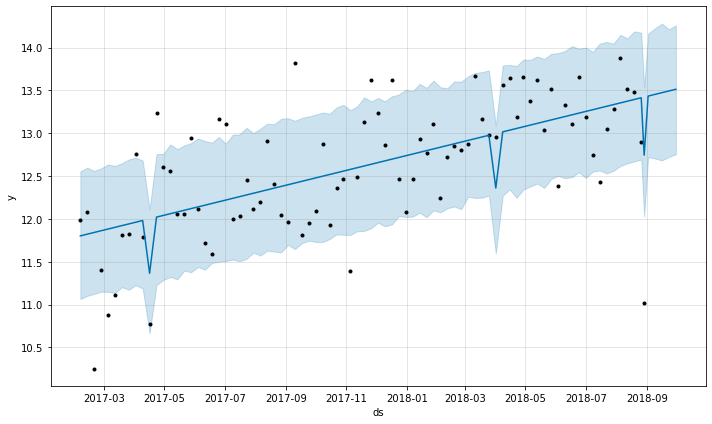

In [231]:
fig_vol1 = m.plot(df_predict_vol)

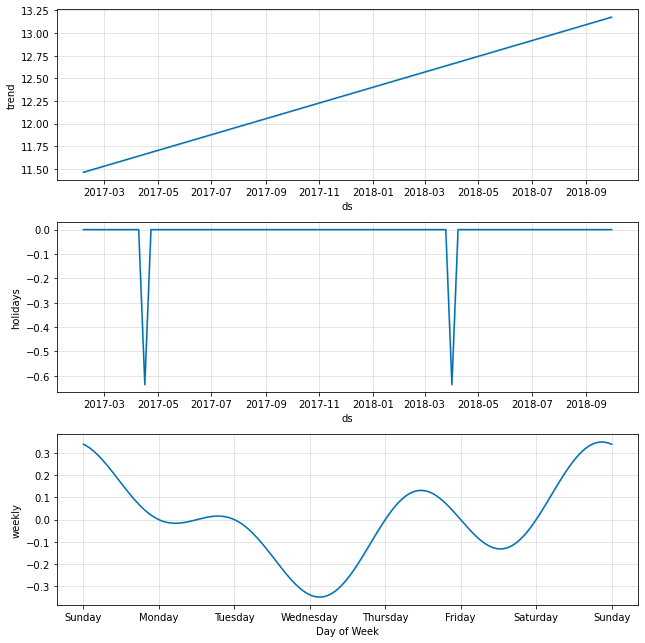

In [232]:
fig_vol2 = m.plot_components(df_predict_vol)

In [233]:
df_forecast_result_vol = df_predict_vol[['ds','yhat','yhat_lower','yhat_upper']]
df_forecast_result_vol['yhat'] = df_forecast_result_vol['yhat'].apply(lambda x:np.exp(x))
df_forecast_result_vol['yhat_lower'] = df_forecast_result_vol['yhat_lower'].apply(lambda x:np.exp(x)) 
df_forecast_result_vol['yhat_upper'] = df_forecast_result_vol['yhat_upper'].apply(lambda x:np.exp(x))  

In [234]:
#Buat Dataframe hasil forecast menjadi bentuk prediksi bulanan
df_forecast_result_vol['period'] = pd.to_datetime(df_forecast_result_vol['ds']).dt.to_period('M')
df_forecast_result_vol

,ds,yhat,yhat_lower,yhat_upper,period
0,2017-02-05,133544.236341,63875.903385,2.837466e+05,2017-02
1,2017-02-12,136228.741923,66281.977282,2.961235e+05,2017-02
2,2017-02-19,138967.211422,67843.594311,2.850287e+05,2017-02
3,2017-02-26,141760.729623,69574.177578,2.937406e+05,2017-02
4,2017-03-05,144610.403125,69475.464153,3.076541e+05,2017-03
...,...,...,...,...,...
83,2018-09-02,682967.583713,334797.561923,1.415878e+06,2018-09
84,2018-09-09,696696.594244,329246.089872,1.508423e+06,2018-09
85,2018-09-16,710701.585266,322381.401971,1.590948e+06,2018-09
86,2018-09-23,724988.104540,335690.762144,1.489110e+06,2018-09


In [235]:
df_forecast_vol_monthly = df_forecast_result_vol.groupby('period').agg({'ds':'max','yhat':'sum'})
df_forecast_vol_monthly

,ds,yhat
period,,
2017-02,2017-02-26,5.505009e+05
2017-03,2017-03-26,5.961183e+05
2017-04,2017-04-30,7.384041e+05
2017-05,2017-05-28,7.130579e+05
2017-06,2017-06-25,7.721456e+05
2017-07,2017-07-30,1.055771e+06
2017-08,2017-08-27,9.236163e+05
2017-09,2017-09-24,1.000152e+06
2017-10,2017-10-29,1.367529e+06


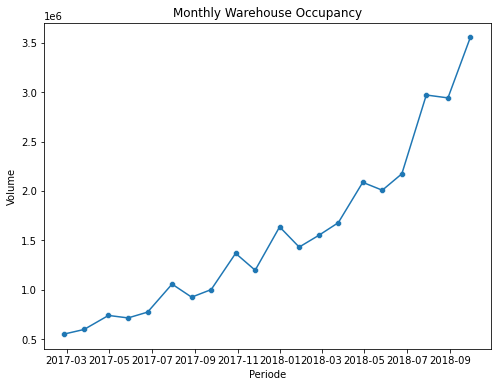

In [236]:
plt.figure(figsize=(8,6))
sns.lineplot(data = df_forecast_vol_monthly, x = 'ds', y = 'yhat')
sns.scatterplot(data = df_forecast_vol_monthly, x = 'ds', y = 'yhat')
plt.xlabel('Periode')
plt.ylabel('Volume')
plt.title('Monthly Warehouse Occupancy')
plt.show()

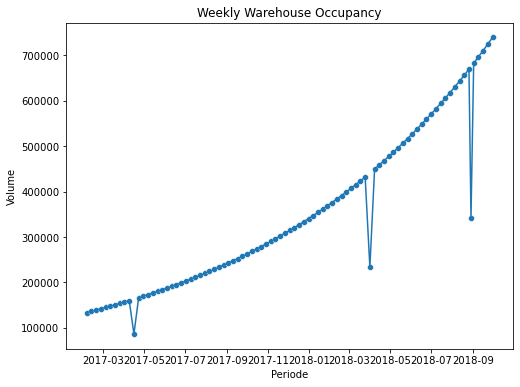

In [237]:
plt.figure(figsize=(8,6))
sns.lineplot(data = df_forecast_result_vol, x = 'ds', y = 'yhat')
sns.scatterplot(data = df_forecast_result_vol, x = 'ds', y = 'yhat')
plt.xlabel('Periode')
plt.ylabel('Volume')
plt.title('Weekly Warehouse Occupancy')
plt.show()

In [238]:
df_forecast_result_vol.tail(5)

,ds,yhat,yhat_lower,yhat_upper,period
83,2018-09-02,682967.583713,334797.561923,1.415878e+06,2018-09
84,2018-09-09,696696.594244,329246.089872,1.508423e+06,2018-09
85,2018-09-16,710701.585266,322381.401971,1.590948e+06,2018-09
86,2018-09-23,724988.104540,335690.762144,1.489110e+06,2018-09
87,2018-09-30,739561.811344,346372.370617,1.559273e+06,2018-09


### **Conclusion & Recommendation**

**Conclusion**

* Untuk model prediksi Expected Revenue, digunakan feature engineering Binning data bulanan dimana model menghasilkan MAPE 12.4%, setelah dilakukan Hyperparameter Tuning didapati performa model meningkat dengan MAPE menjadi 11.5%. Nilai MAPE 11,5% menjadikan model ini dapat dikategorikan ke dalam *'good forecasting'* (Lewis, 1982).

* Untuk model prediksi Quantity Sales, digunakan feature engineering Binning data mingguan & Log Transform dimana model menghasilkan MAPE 21.3%, setelah dilakukan Hyperparameter Tuning didapati ada sedikit peningkatan performa model dengan MAPE menjadi 21.1%. Nilai MAPE 21.1% menjadikan model ini dapat dikategorikan ke dalam *'reasonable forecasting'* (Lewis, 1982).

* Untuk model prediksi Volume, digunakan feature engineering Binning Mingguan & Log Transform dimana model menghasilkan MAPE 32%, setelah dilakukan Hyperparamter Tuning didapati ada sedikit peningkatan performa model dengan MAPE menjadi 31.7%. Nilai MAPE 31.7% menjadikan model ini dapat dikategorikan ke dalam *'reasonable forecasting'* (Lewis, 1982).

**Recommendation**

* Expected Revenue untuk bulan September 2018 adalah 46,760. Dengan asumsi Item Management Fee 5%, maka expected income dari perusahaan adalah 2,338.

* Expected Volume untuk bulan September 2018 adalah 3,554 liter. Disarankan untuk melakukan replenishment barang setiap minggu agar tidak perlu menyediakan kapasitas gudang 3,600 liter, untuk angka tertinggi expected volume ada pada 739 Liter pada minggu terakhir pada bulan September 2018.

* Replenishment dapat dilakukan pada Weekend (Sabtu/Minggu) karena dari data exploration, terlihat bahwa trend pesanan barang paling rendah di hari Sabtu/Minggu.

* Apabila memungkinkan, tambahkan informasi produk seperti Brand, Jenis Produk, Nama Produk pada data untuk memungkinkan forecast spesifik terhadap item-item tersebut.

* Apabila memungkinkan, dapatkan informasi stock per item di gudang, untuk memungkinkan hasil forecast Sales Quantity digunakan untuk menjadi masukan rekomendasi kapan harus dilakukan replenishment suatu item.

* Tambahkan data historis untuk meningkatkan performa model yang di training.